# Country Analysis and Clustering

data : 

Country: [Kaggle](https://www.kaggle.com/datasets/fernandol/countries-of-the-world)

ISO-Code: [Kaggle](https://www.kaggle.com/datasets/juanumusic/countries-iso-codes)

**Goal:**<br>
The goal of this Notebook is to use a k-means to recognize the various Country.<br>
First I perform an EDA on the dataframe and then I will develop the k-means model

**<p style='font-size: 18px; color: blue;'>Imports and Data</p>**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import warnings

In [19]:
warnings.filterwarnings("ignore")

In [20]:
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 50)

In [21]:
sns.set()

In [3]:
df = pd.read_csv('Data/countries_of_the_world.csv')
country_code = pd.read_csv('Data/wikipedia-iso-country-codes.csv')

## Data Manipulation

In [23]:
df.Country = df.Country.str.strip()
df.Region = df.Region.str.strip()
df.columns = df.columns.str.strip()

In [24]:
columns = df.columns.to_list()

for column in columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace(',', '.')

<p style='font-size: 18px; color: blue;'>I correct the presence of a comma by replacing it with a period in order to transform the columns into float values.</p>

## EDA

In [13]:
df.shape

(227, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [25]:
num_col = ['Service', 'Industry', 'Agriculture',
           'Deathrate', 'Birthrate', 'Climate',
          'Other (%)', 'Crops (%)', 'Arable (%)', 
           'Phones (per 1000)', 'Literacy (%)',
          'Infant mortality (per 1000 births)',
          'Net migration', 'Coastline (coast/area ratio)',
          'Pop. Density (per sq. mi.)']

for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='raise', downcast='float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float32
 5   Coastline (coast/area ratio)        227 non-null    float32
 6   Net migration                       224 non-null    float32
 7   Infant mortality (per 1000 births)  224 non-null    float32
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float32
 10  Phones (per 1000)                   223 non-null    float32
 11  Arable (%)                          225 non-n

In [14]:
df.describe().T

count          mean           std  \
Population                          227.0  2.874028e+07  1.178913e+08   
Area (sq. mi.)                      227.0  5.982270e+05  1.790282e+06   
Pop. Density (per sq. mi.)          227.0  3.790472e+02  1.660186e+03   
Coastline (coast/area ratio)        227.0  2.116533e+01  7.228690e+01   
Net migration                       224.0  3.812504e-02  4.889270e+00   
Infant mortality (per 1000 births)  224.0  3.550697e+01  3.538990e+01   
GDP ($ per capita)                  226.0  9.689823e+03  1.004914e+04   
Literacy (%)                        209.0  8.283828e+01  1.972218e+01   
Phones (per 1000)                   223.0  2.360614e+02  2.279919e+02   
Arable (%)                          225.0  1.379711e+01  1.304040e+01   
Crops (%)                           225.0  4.564222e+00  8.361470e+00   
Other (%)                           225.0  8.163835e+01  1.614083e+01   
Climate                             205.0  2.139024e+00  6.993967e-01   
Birthrate                           224.0  2.211473e+01  1.117672e+01   
Deathrate                           223.0  9.241345e+00  4.990026e+00   
Agriculture                         212.0  1.508443e-01  1.467980e-01   
Industry                            211.0  2.827108e-01  1.382722e-01   
Service                             212.0  5.652831e-01  1.658410e-01   

                                            min            25%           50%  \
Population                          7026.000000  437624.000000  4.786994e+06   
Area (sq. mi.)                         2.000000    4647.500000  8.660000e+04   
Pop. Density (per sq. mi.)             0.000000      29.150000  7.880000e+01   
Coastline (coast/area ratio)           0.000000       0.100000  7.300000e-01   
Net migration                        -20.990000      -0.927500  0.000000e+00   
Infant mortality (per 1000 births)     2.290000       8.150000  2.100000e+01   
GDP ($ per capita)                   500.000000    1900.000000  5.550000e+03   
Literacy (%)                          17.600000      70.599998  9.250000e+01   
Phones (per 1000)                      0.200000      37.800003  1.762000e+02   
Arable (%)                             0.000000       3.220000  1.042000e+01   
Crops (%)                              0.000000       0.190000  1.030000e+00   
Other (%)                             33.330002      71.650002  8.570000e+01   
Climate                                1.000000       2.000000  2.000000e+00   
Birthrate                              7.290000      12.672501  1.879000e+01   
Deathrate                              2.290000       5.910000  7.840000e+00   
Agriculture                            0.000000       0.037750  9.900000e-02   
Industry                               0.020000       0.193000  2.720000e-01   
Service                                0.062000       0.429250  5.710000e-01   

                                             75%           max  
Population                          1.749777e+07  1.313974e+09  
Area (sq. mi.)                      4.418110e+05  1.707520e+07  
Pop. Density (per sq. mi.)          1.901500e+02  1.627150e+04  
Coastline (coast/area ratio)        1.034500e+01  8.706600e+02  
Net migration                       9.975000e-01  2.306000e+01  
Infant mortality (per 1000 births)  5.570500e+01  1.911900e+02  
GDP ($ per capita)                  1.570000e+04  5.510000e+04  
Literacy (%)                        9.800000e+01  1.000000e+02  
Phones (per 1000)                   3.896500e+02  1.035600e+03  
Arable (%)                          2.000000e+01  6.211000e+01  
Crops (%)                           4.440000e+00  5.068000e+01  
Other (%)                           9.544000e+01  1.000000e+02  
Climate                             3.000000e+00  4.000000e+00  
Birthrate                           2.982000e+01  5.073000e+01  
Deathrate                           1.060500e+01  2.974000e+01  
Agriculture                         2.210000e-01  7.690000e-01  
Industry              

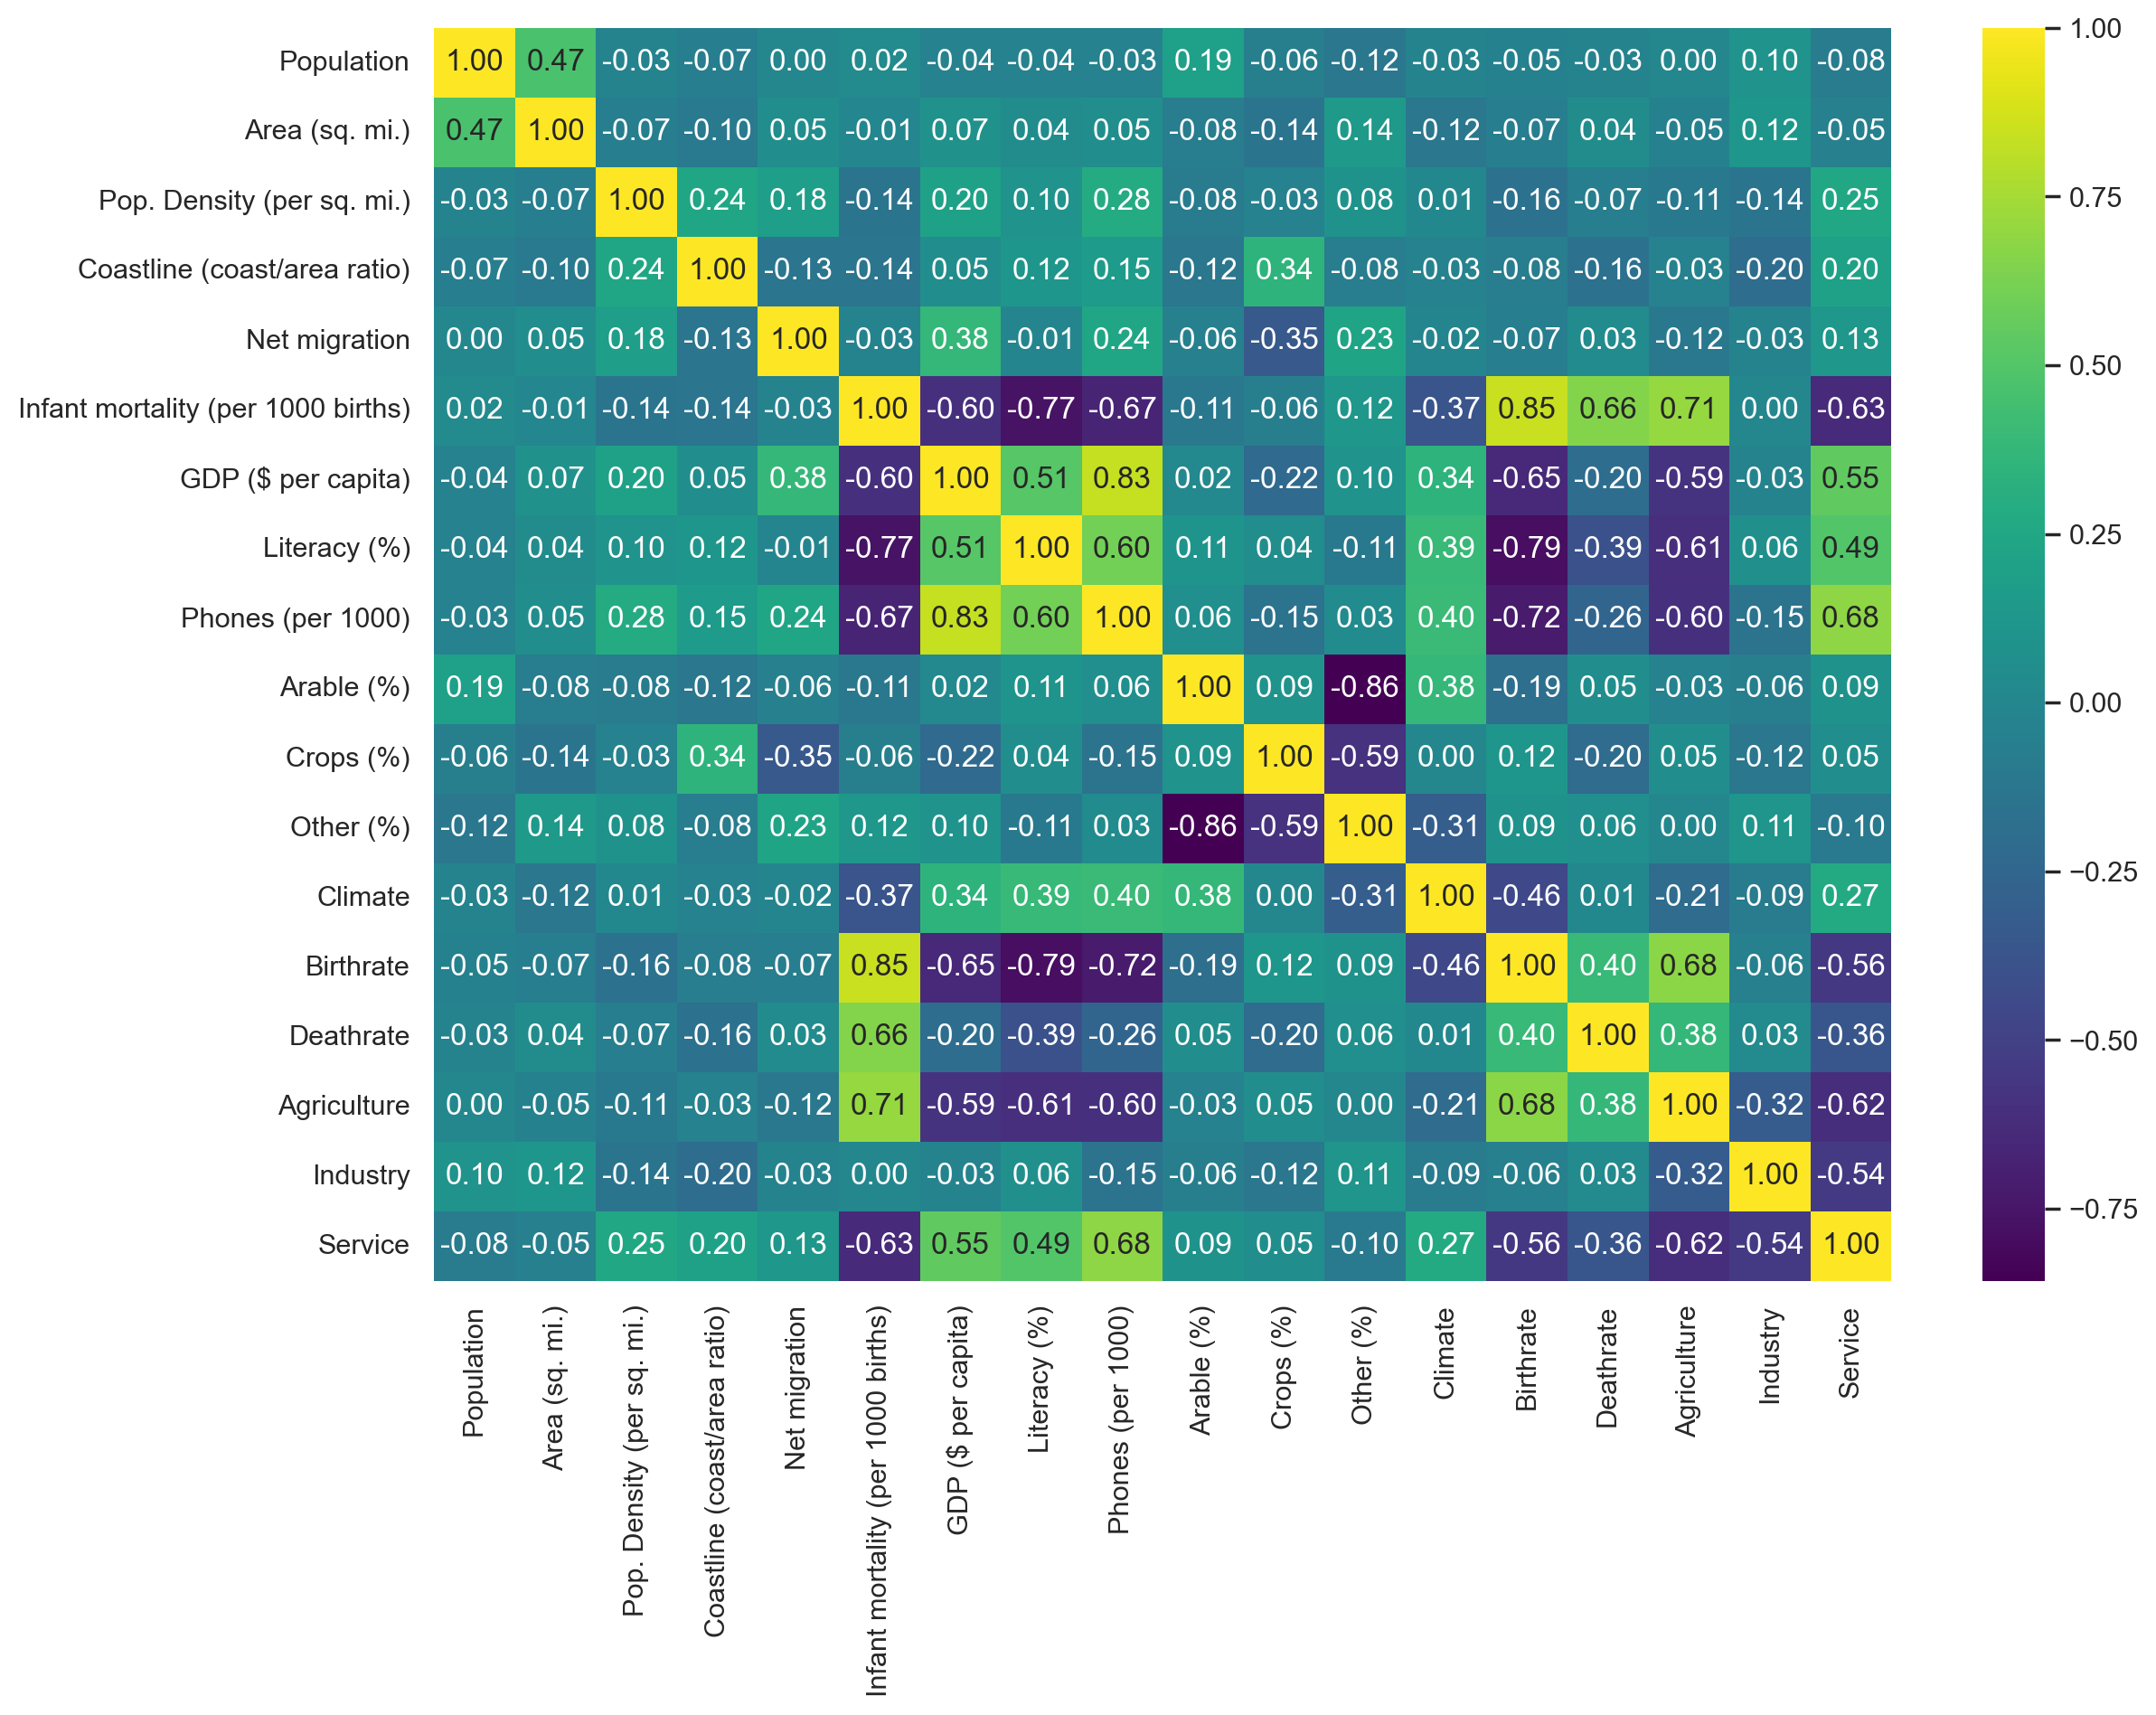

In [15]:
plt.figure(figsize=(13,9), dpi=200)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='viridis');

<Figure size 3000x2000 with 0 Axes>

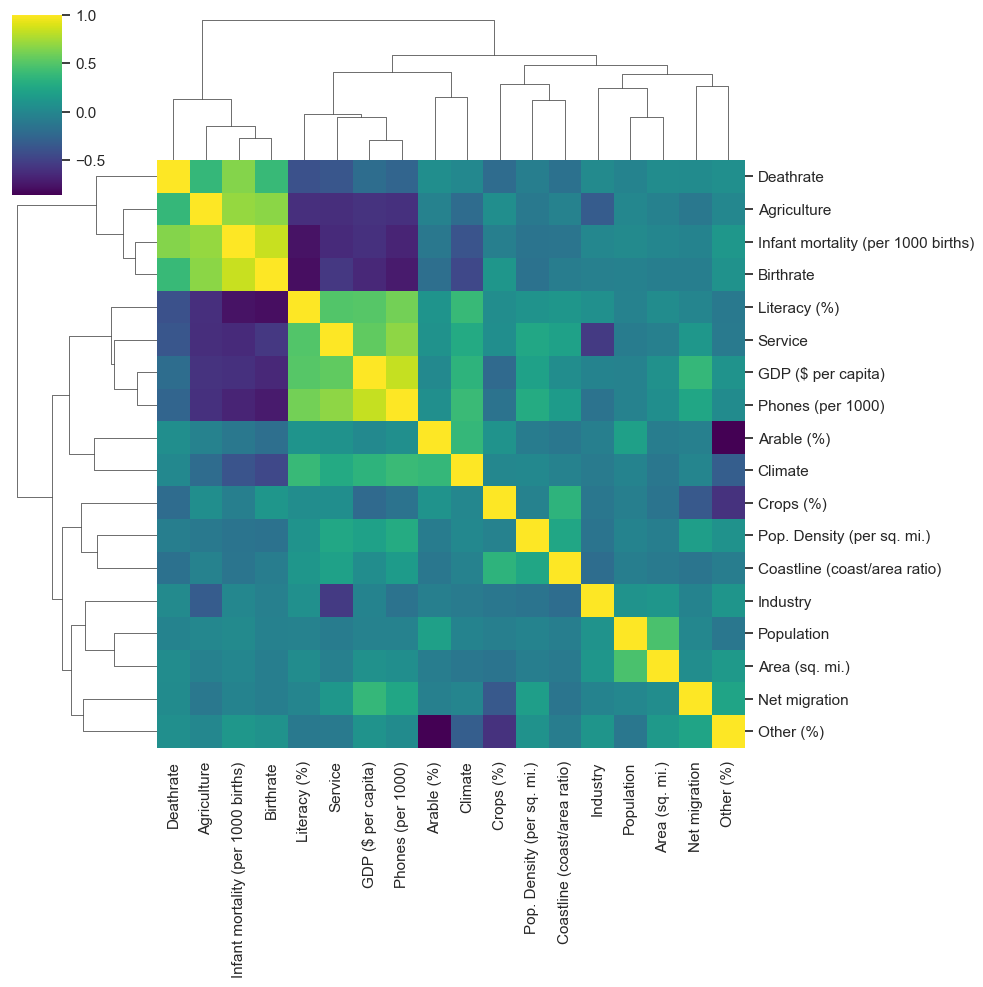

In [16]:
plt.figure(figsize=(15,10), dpi=200)
sns.clustermap(df.corr(), cmap='viridis')

### Population

In [17]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(df, x='Population')
plt.title("Plot of all the Population")
plt.show()

In [18]:
# .06*1e9 --> 60.000.000,0
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(df, x='Population')
plt.xlim(0, .06*1e9)
plt.title("Nations with Population Under 60.000.000,0");

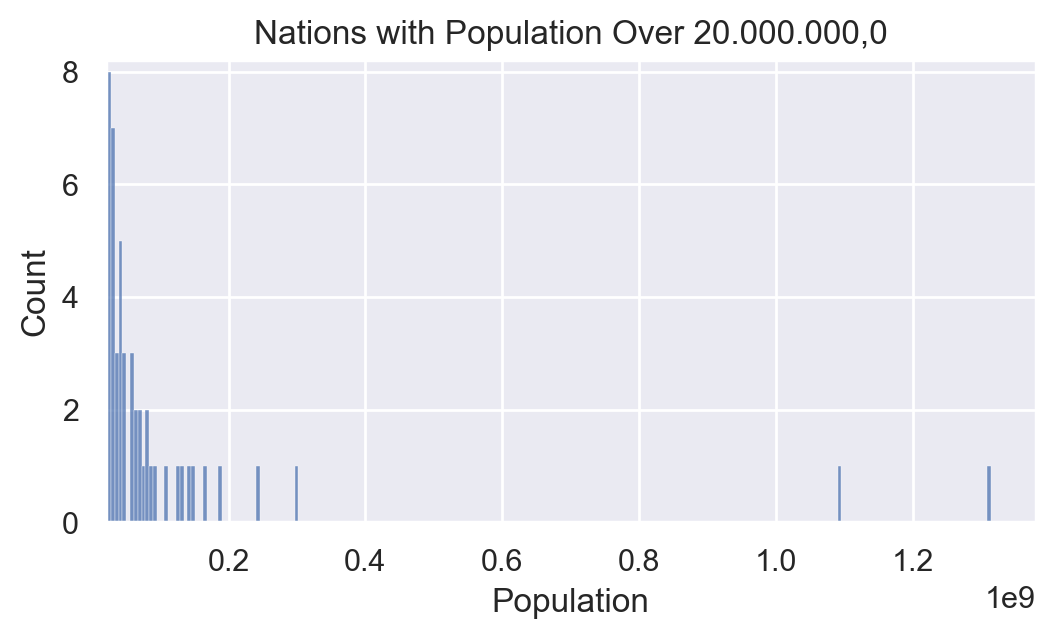

In [19]:
# 20.000.000,0
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(df, x='Population')
plt.xlim(.02*1e9, )
plt.ylim(0, 8.2)
plt.title("Nations with Population Over 20.000.000,0");

### infant Mortality Research

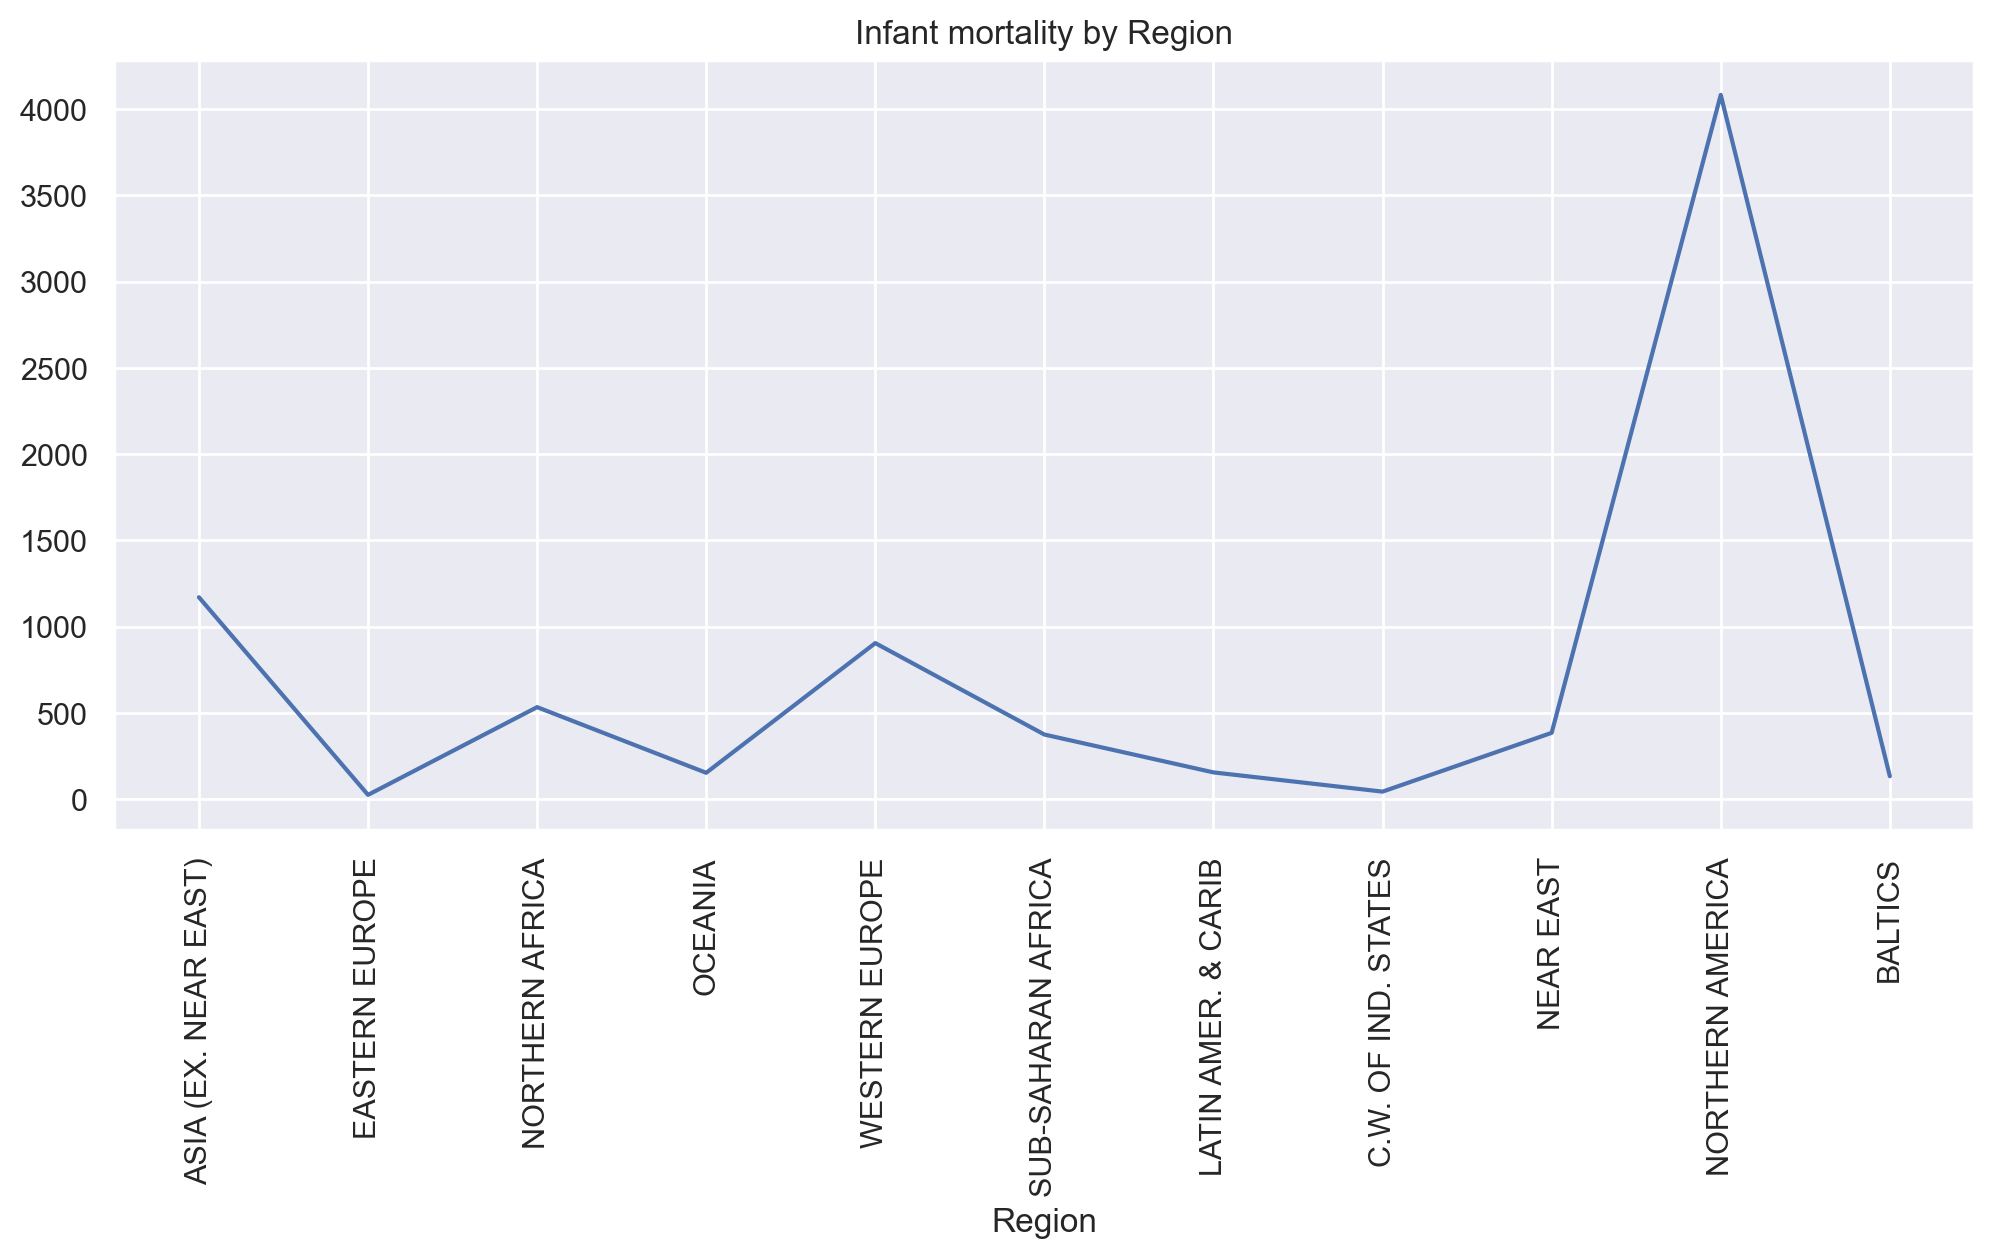

In [20]:
fig, ax = plt.subplots(figsize=(12,5), dpi=200)
region_labels = df['Region'].unique()  
region_positions = range(len(region_labels)) 

df.groupby('Region')['Infant mortality (per 1000 births)'].sum().plot(ax=ax)

ax.set_xticks(region_positions)  
ax.set_xticklabels(region_labels, rotation=90)  
ax.set_title('Infant mortality by Region')

plt.show()

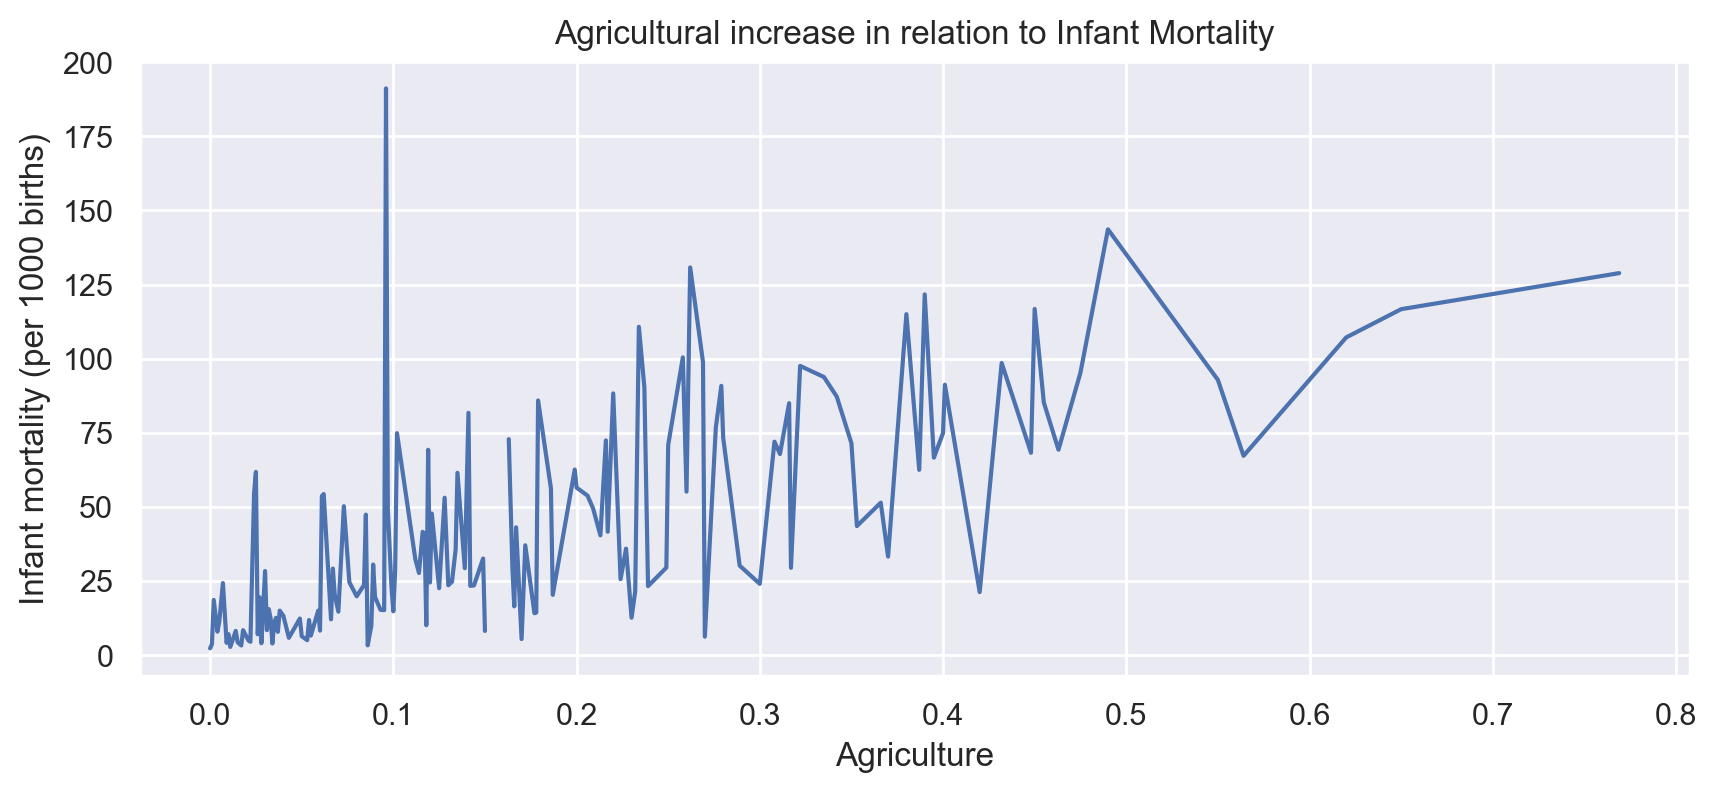

In [21]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

df.groupby('Agriculture')['Infant mortality (per 1000 births)'].mean().plot(ax=ax)

ax.set_ylabel('Infant mortality (per 1000 births)')
ax.set_title("Agricultural increase in relation to Infant Mortality")

plt.show()

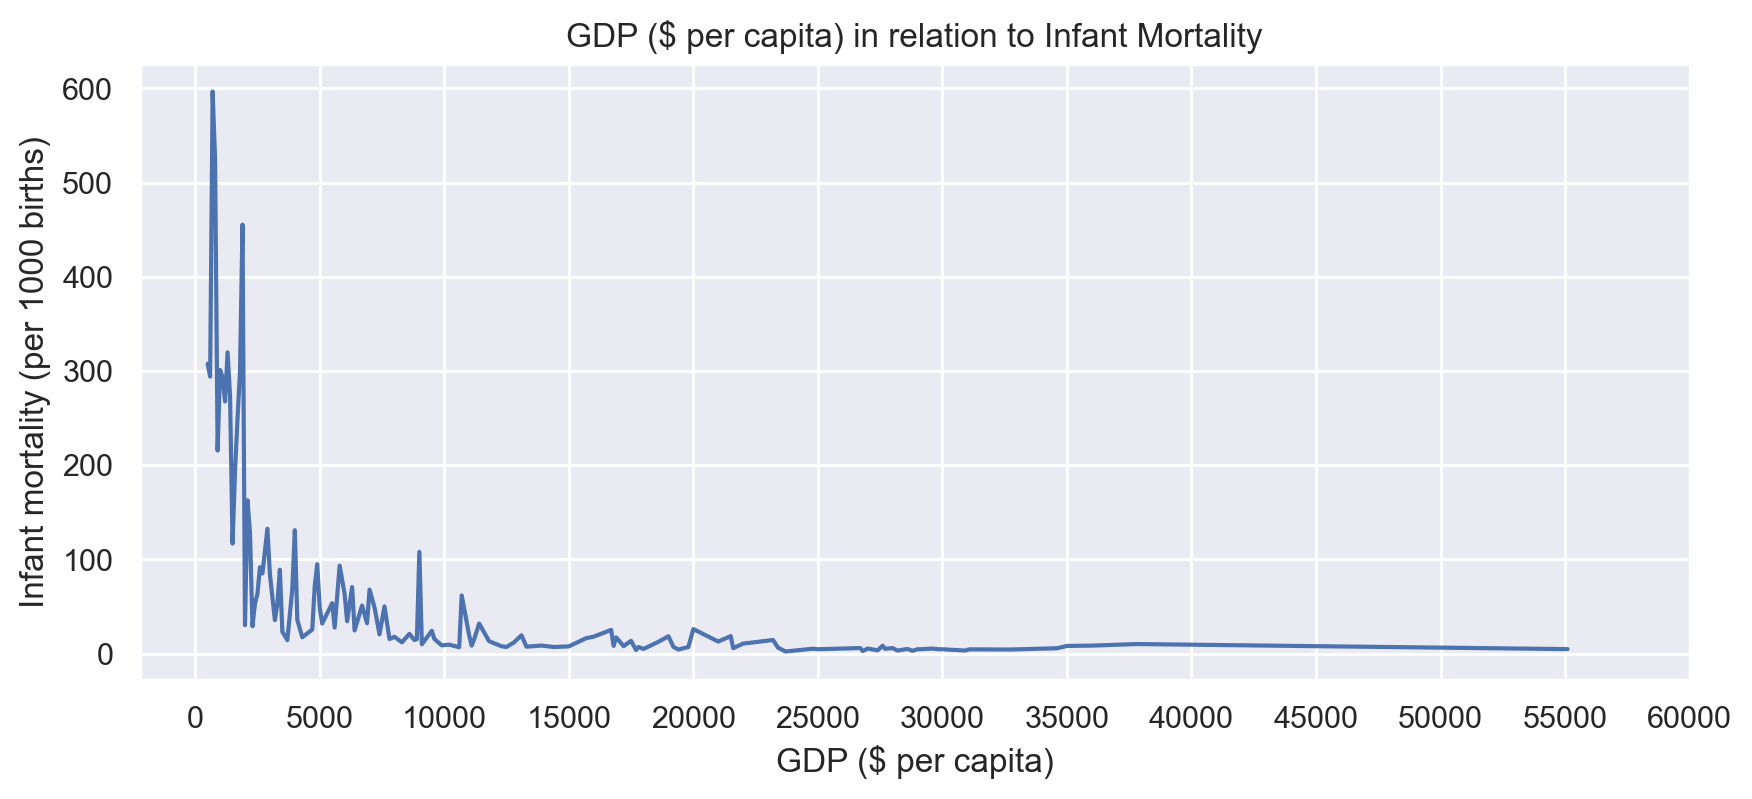

In [22]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

df.groupby('GDP ($ per capita)')['Infant mortality (per 1000 births)'].sum().plot(ax=ax)

ax.set_ylabel('Infant mortality (per 1000 births)')
ax.set_title("GDP ($ per capita) in relation to Infant Mortality")
ax.set_xticks(range(0, 60001, 5000))
plt.show()

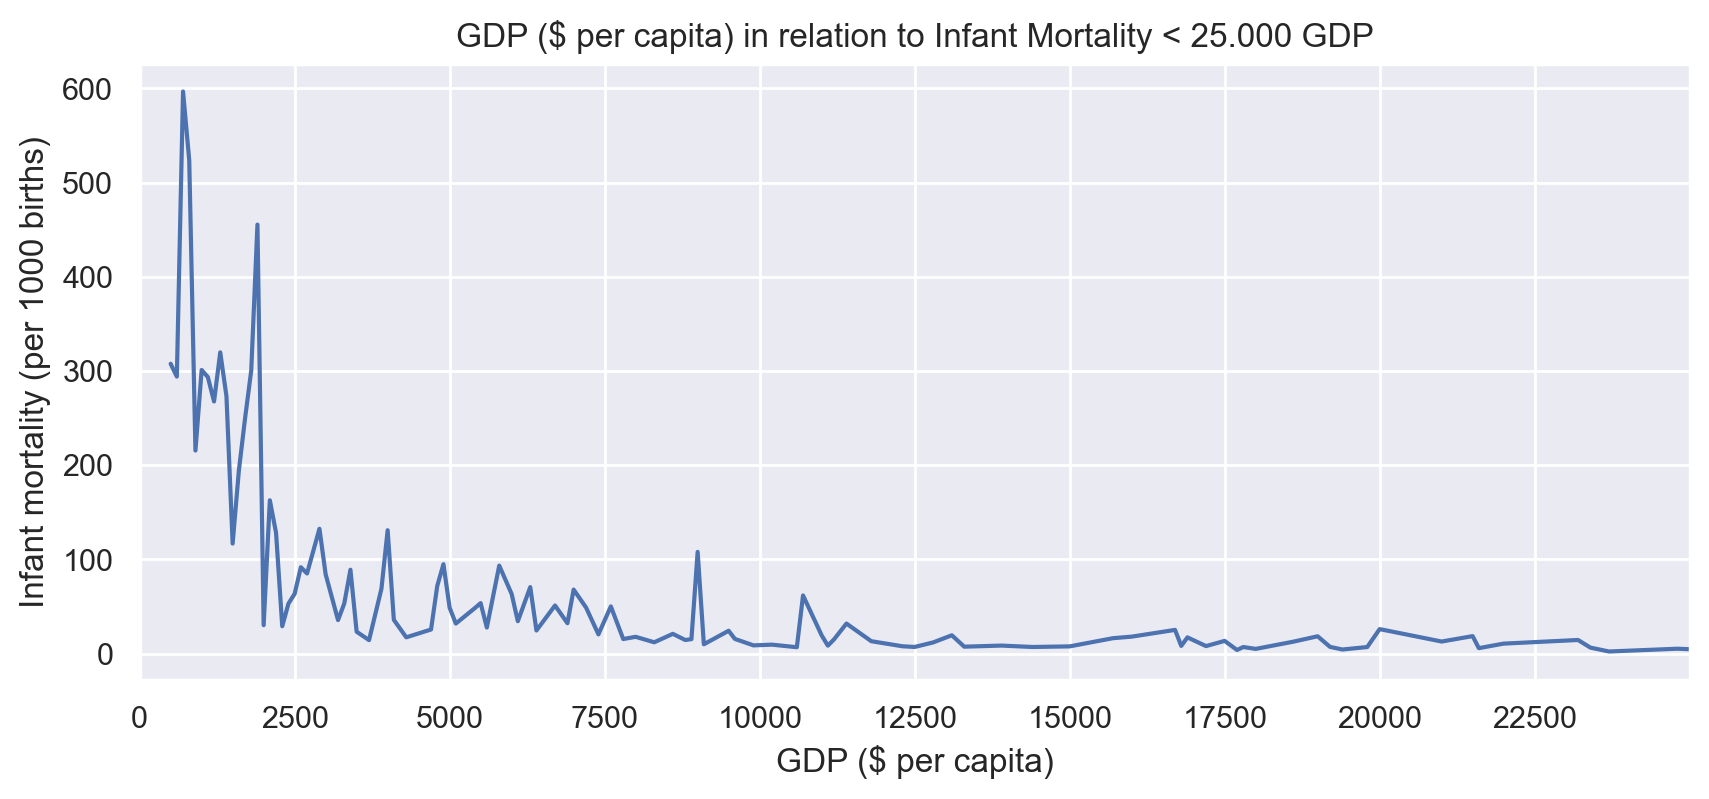

In [23]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

df.groupby('GDP ($ per capita)')['Infant mortality (per 1000 births)'].sum().plot(ax=ax)

ax.set_ylabel('Infant mortality (per 1000 births)')
ax.set_title("GDP ($ per capita) in relation to Infant Mortality < 25.000 GDP")
ax.set_xlim(0, 25000)
ax.set_xticks(range(0, 25000, 2500))
plt.show()

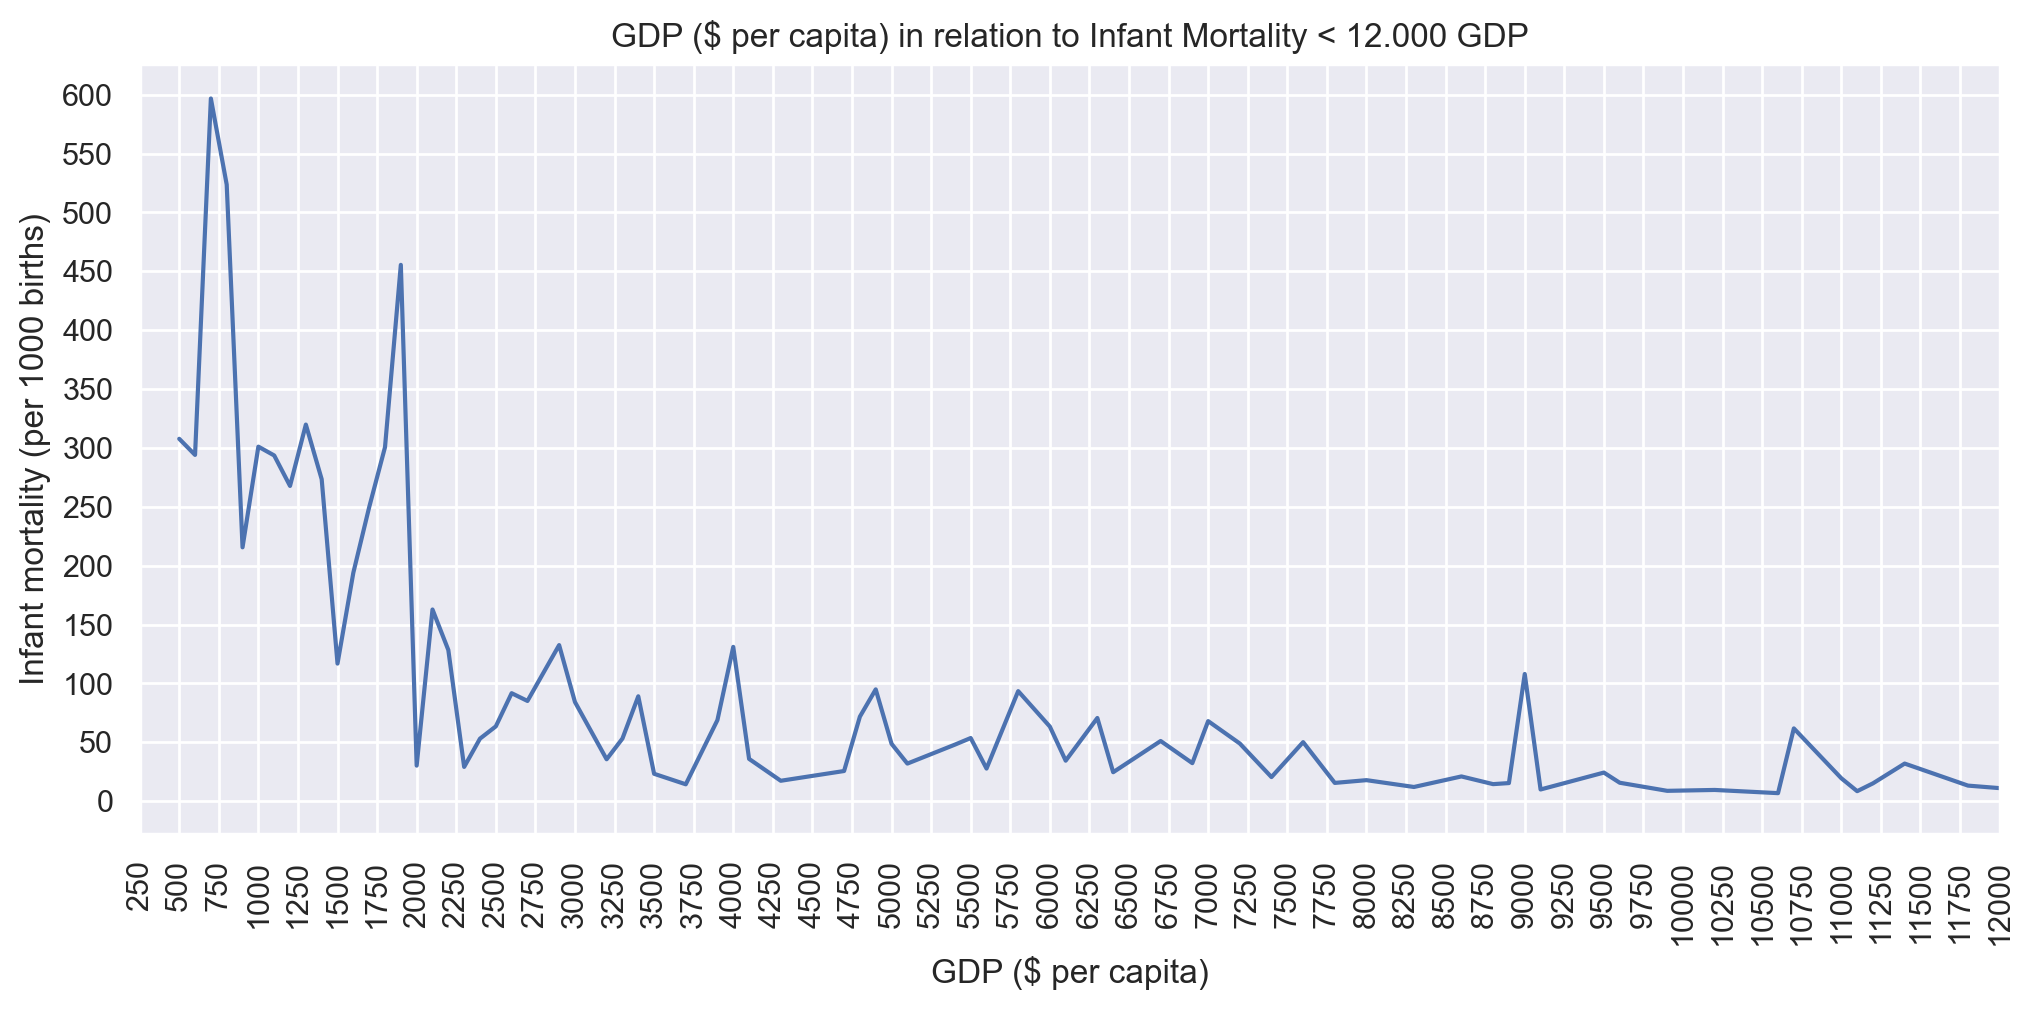

In [24]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=200)
xticks = range(250, 12001, 250)
yticks = range(0, 601, 50)

df.groupby('GDP ($ per capita)')['Infant mortality (per 1000 births)'].sum().plot(ax=ax)

ax.set_ylabel('Infant mortality (per 1000 births)')
ax.set_title("GDP ($ per capita) in relation to Infant Mortality < 12.000 GDP")
ax.set_xlim(left=250, right=12000)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=90)

ax.set_yticks(yticks)

plt.show()

In [25]:
infant_mortality_df = df[df['GDP ($ per capita)']<= 2000]

In [26]:
infant_mortality_df.shape

(61, 20)

In [27]:
print("Dati per GDP per capita <= 2000:\n")
print(f"Numero di regioni: {len(infant_mortality_df['Region'].unique())}\n")
print(f"Regioni:\n{infant_mortality_df['Region'].unique()}\n")

print(f"Number of Country: {len(infant_mortality_df['Country'].unique())}\n")
print("Country List:\n")
print(infant_mortality_df['Country'].unique())

Dati per GDP per capita <= 2000:

Numero di regioni: 6

Regioni:
['ASIA (EX. NEAR EAST)' 'SUB-SAHARAN AFRICA' 'NEAR EAST'
 'LATIN AMER. & CARIB' 'OCEANIA' 'C.W. OF IND. STATES']

Number of Country: 61

Country List:

['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bhutan' 'Burkina Faso'
 'Burma' 'Burundi' 'Cambodia' 'Cameroon' 'Cape Verde'
 'Central African Rep.' 'Chad' 'Comoros' 'Congo. Dem. Rep.'
 'Congo. Repub. of the' "Cote d'Ivoire" 'Djibouti' 'East Timor' 'Eritrea'
 'Ethiopia' 'Gambia. The' 'Gaza Strip' 'Guinea-Bissau' 'Haiti' 'Iraq'
 'Kenya' 'Kiribati' 'Korea. North' 'Kyrgyzstan' 'Laos' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Marshall Islands' 'Mauritania'
 'Micronesia. Fed. St.' 'Moldova' 'Mongolia' 'Mozambique' 'Nepal' 'Niger'
 'Nigeria' 'Rwanda' 'Sao Tome & Principe' 'Senegal' 'Sierra Leone'
 'Solomon Islands' 'Somalia' 'Sudan' 'Tajikistan' 'Tanzania' 'Togo'
 'Tuvalu' 'Uganda' 'Uzbekistan' 'West Bank' 'Yemen' 'Zambia' 'Zimbabwe']


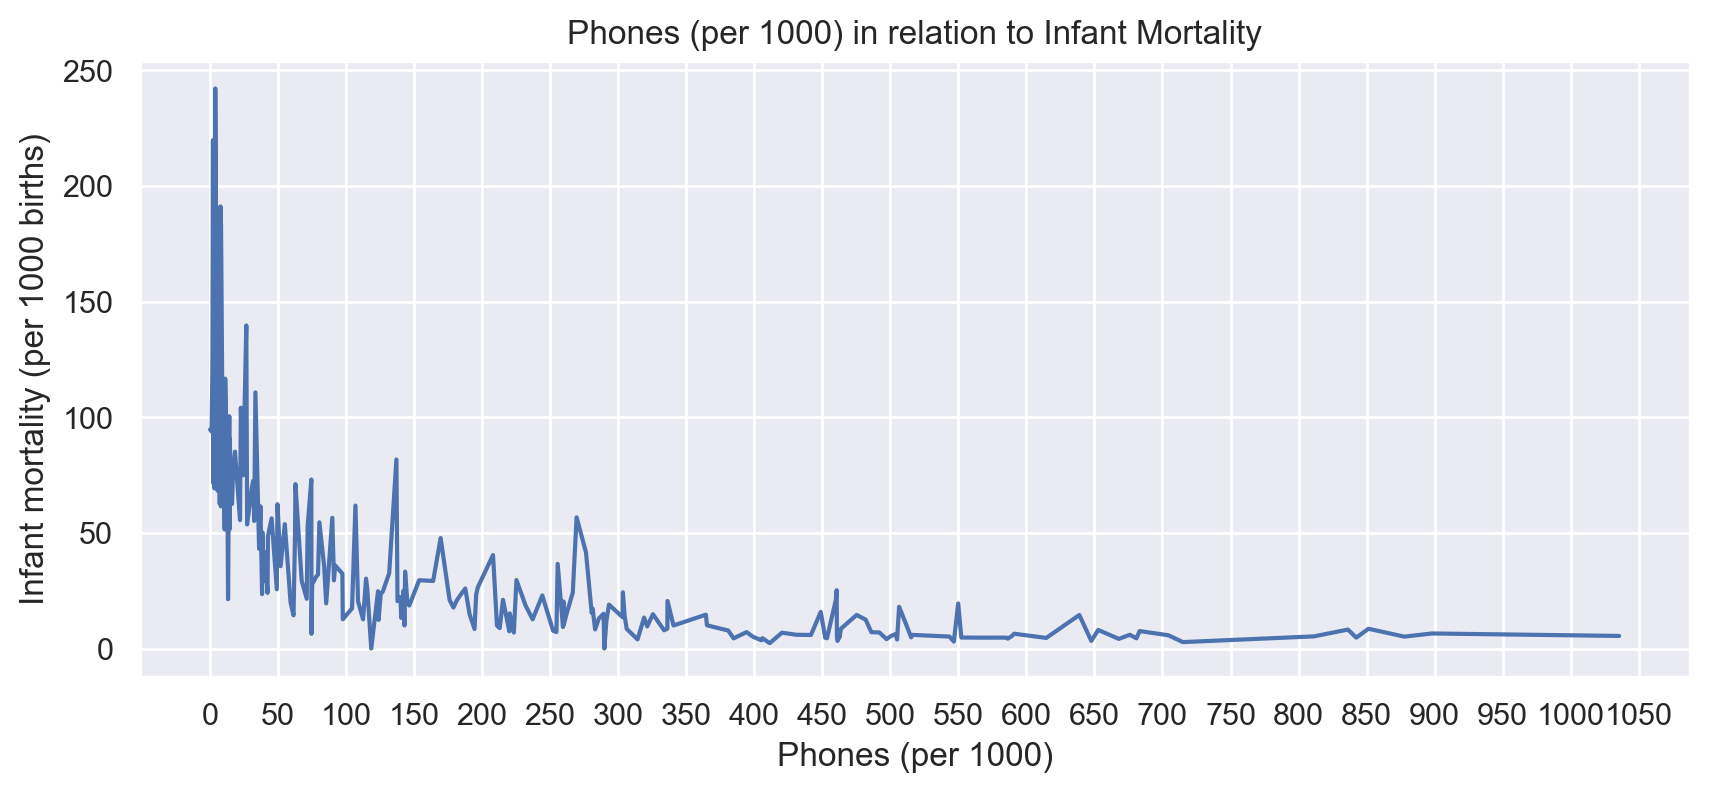

In [28]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

df.groupby('Phones (per 1000)')['Infant mortality (per 1000 births)'].sum().plot(ax=ax)

ax.set_ylabel('Infant mortality (per 1000 births)')
ax.set_title("Phones (per 1000) in relation to Infant Mortality")
ax.set_xticks(range(-0, 1100, 50))
plt.show()

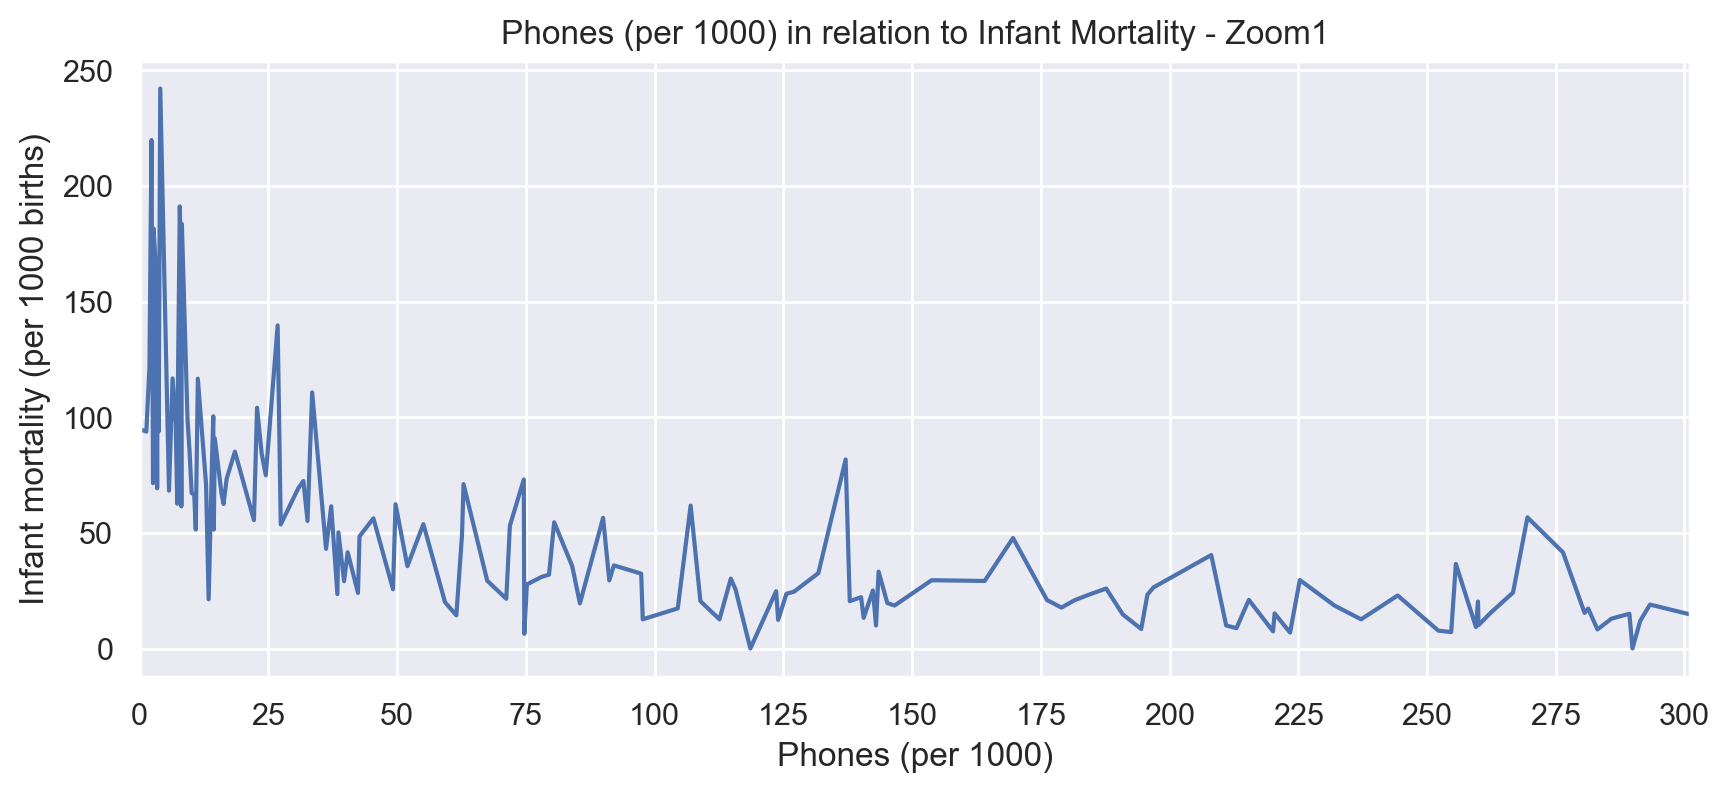

In [29]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
xticks = range(-0, 301, 25)

df.groupby('Phones (per 1000)')['Infant mortality (per 1000 births)'].sum().plot(ax=ax)

ax.set_ylabel('Infant mortality (per 1000 births)')
ax.set_title("Phones (per 1000) in relation to Infant Mortality - Zoom1")
ax.set_xlim(0, 301)
ax.set_xticks(xticks)

plt.show()

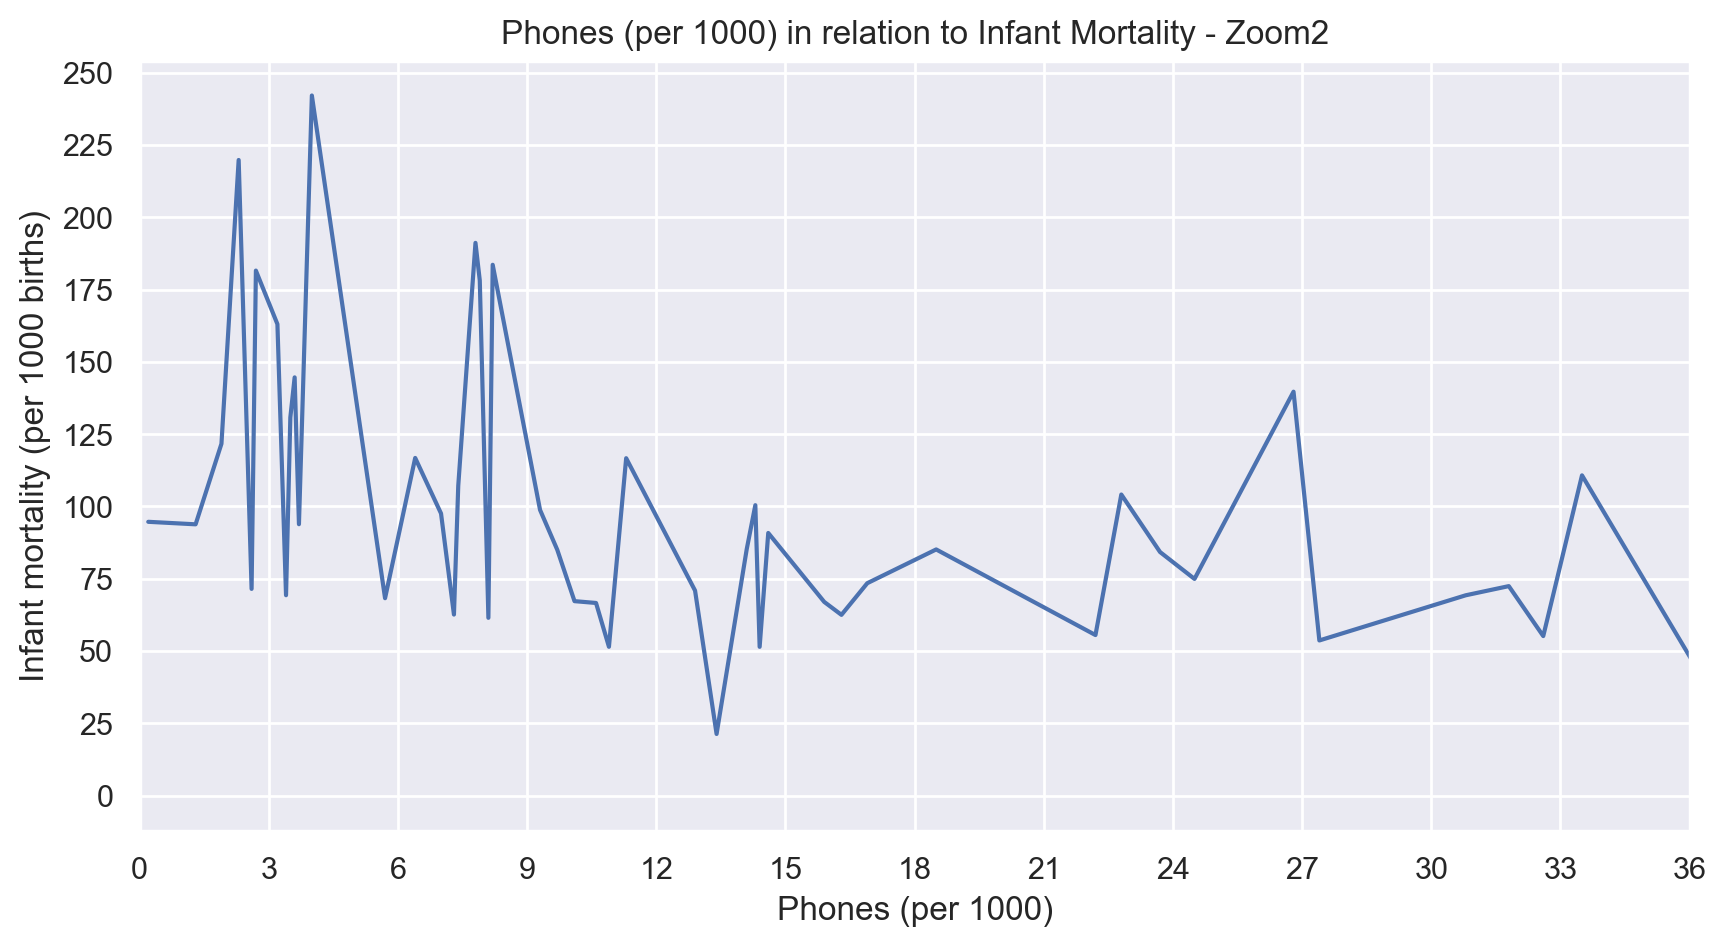

In [30]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
xticks = range(0, 37, 3)

df.groupby('Phones (per 1000)')['Infant mortality (per 1000 births)'].sum().plot(ax=ax)

ax.set_ylabel('Infant mortality (per 1000 births)')
ax.set_title("Phones (per 1000) in relation to Infant Mortality - Zoom2")
ax.set_xlim(0, 36)
ax.set_xticks(xticks)
ax.set_yticks(range(0,251,25))

plt.show()

In [1]:
inf_mor = df.groupby('Infant mortality (per 1000 births)').describe().sort_values('Infant mortality (per 1000 births)', ascending=False).T
pd.set_option('display.max_rows', 500)
inf_mor

### GDP

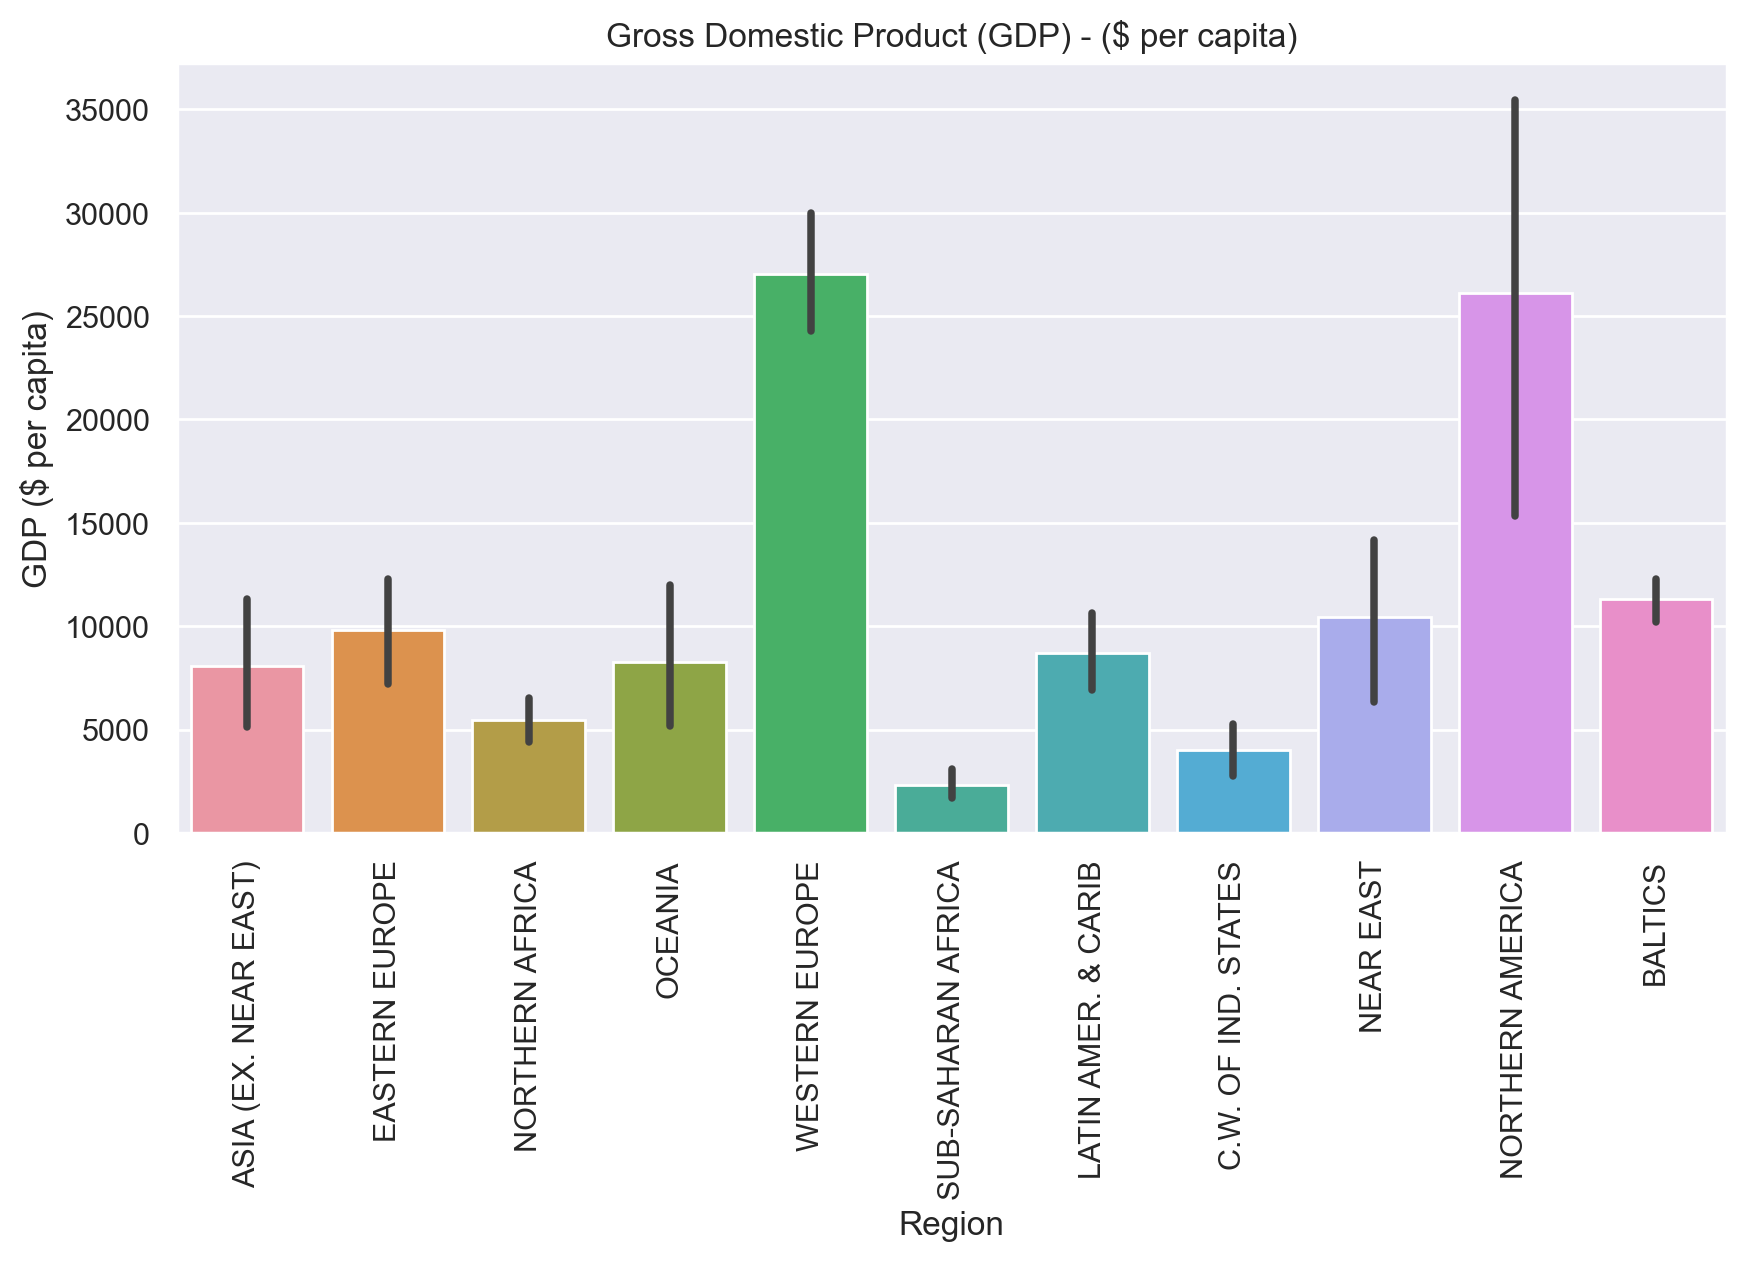

In [32]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(data=df, x='Region',y='GDP ($ per capita)')
plt.xticks(rotation=90)
plt.title("Gross Domestic Product (GDP) - ($ per capita)");

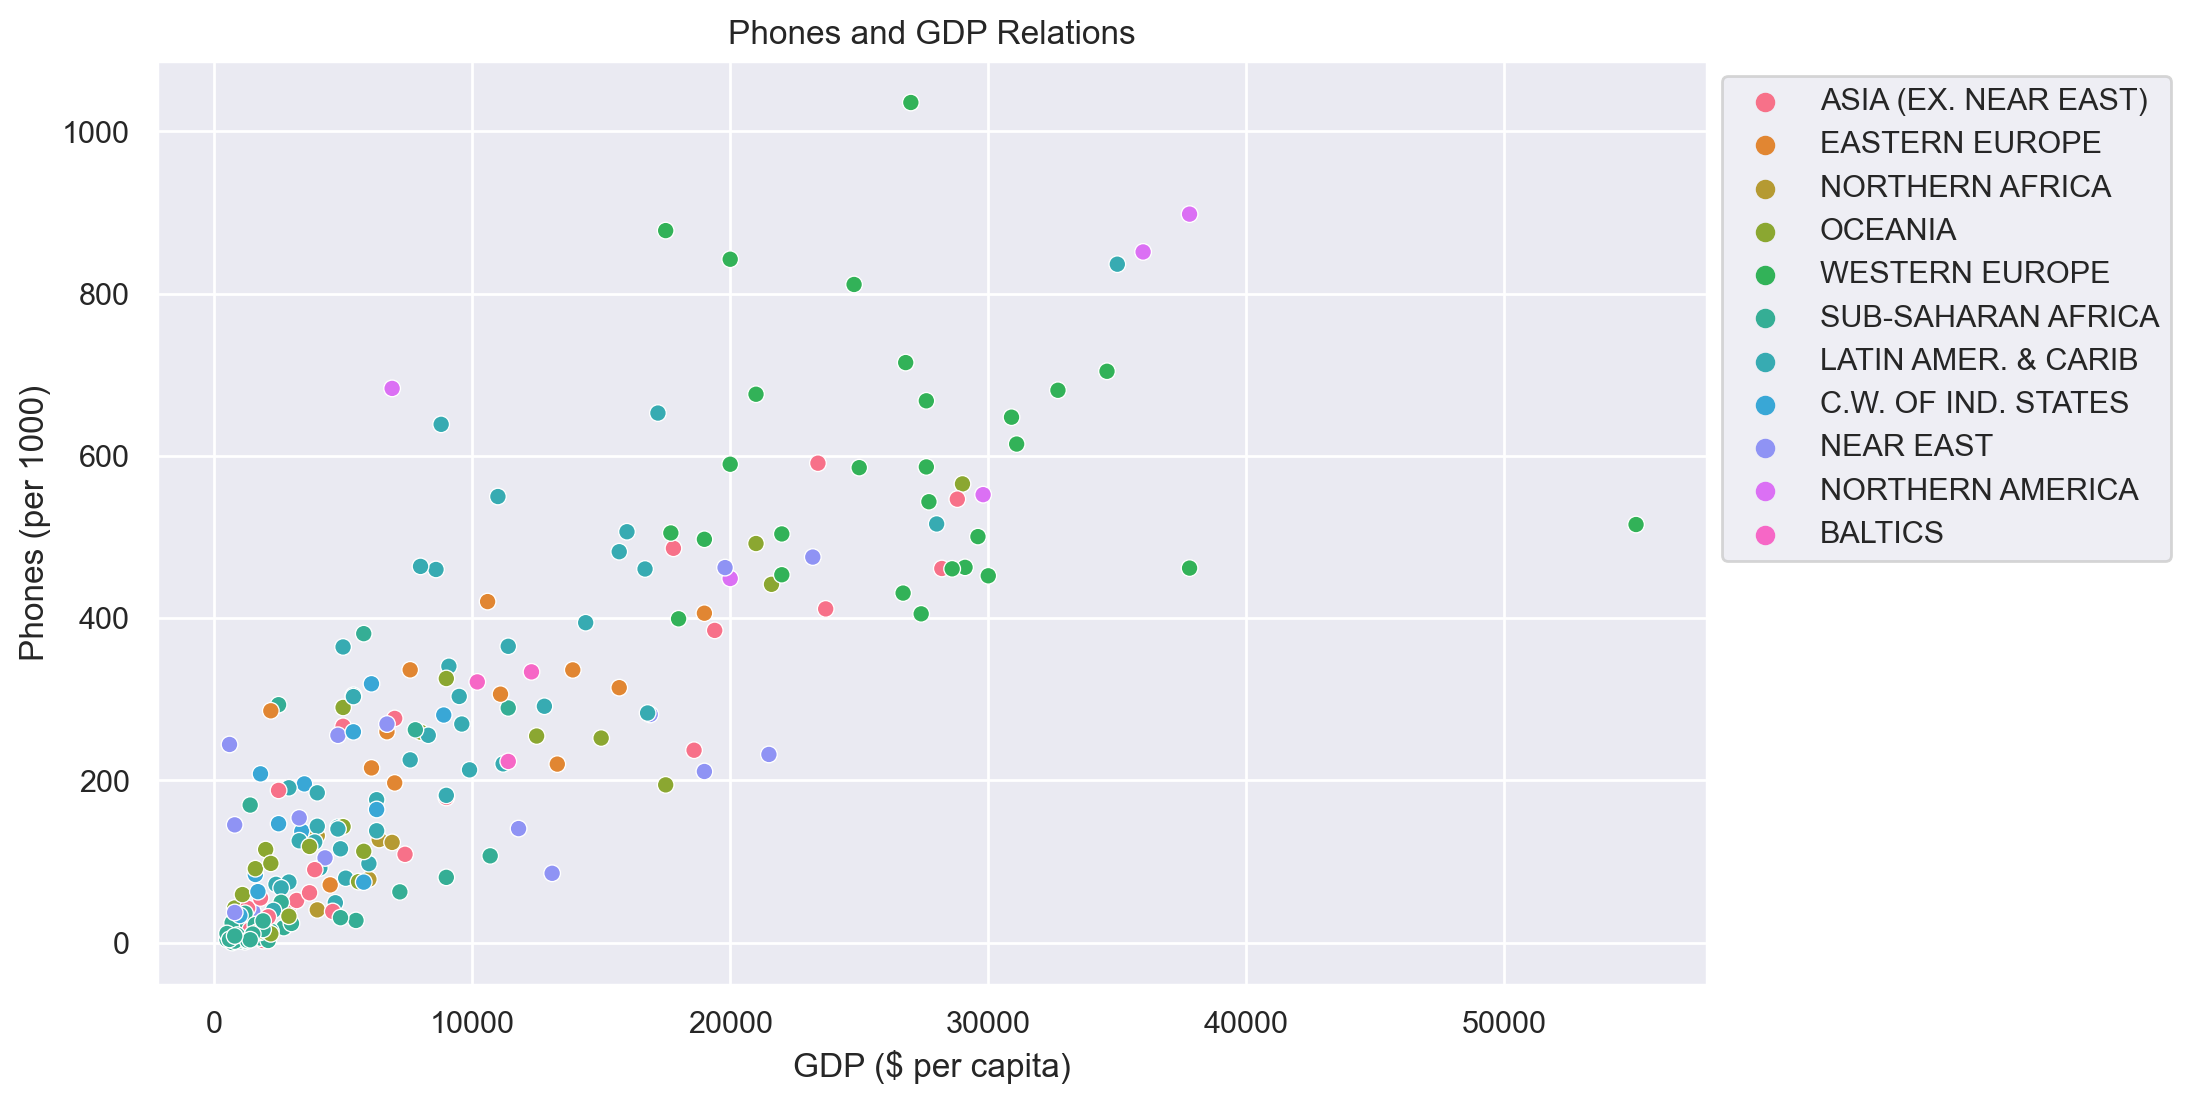

In [33]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, y='Phones (per 1000)', x='GDP ($ per capita)', hue='Region')
plt.title("Phones and GDP Relations")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

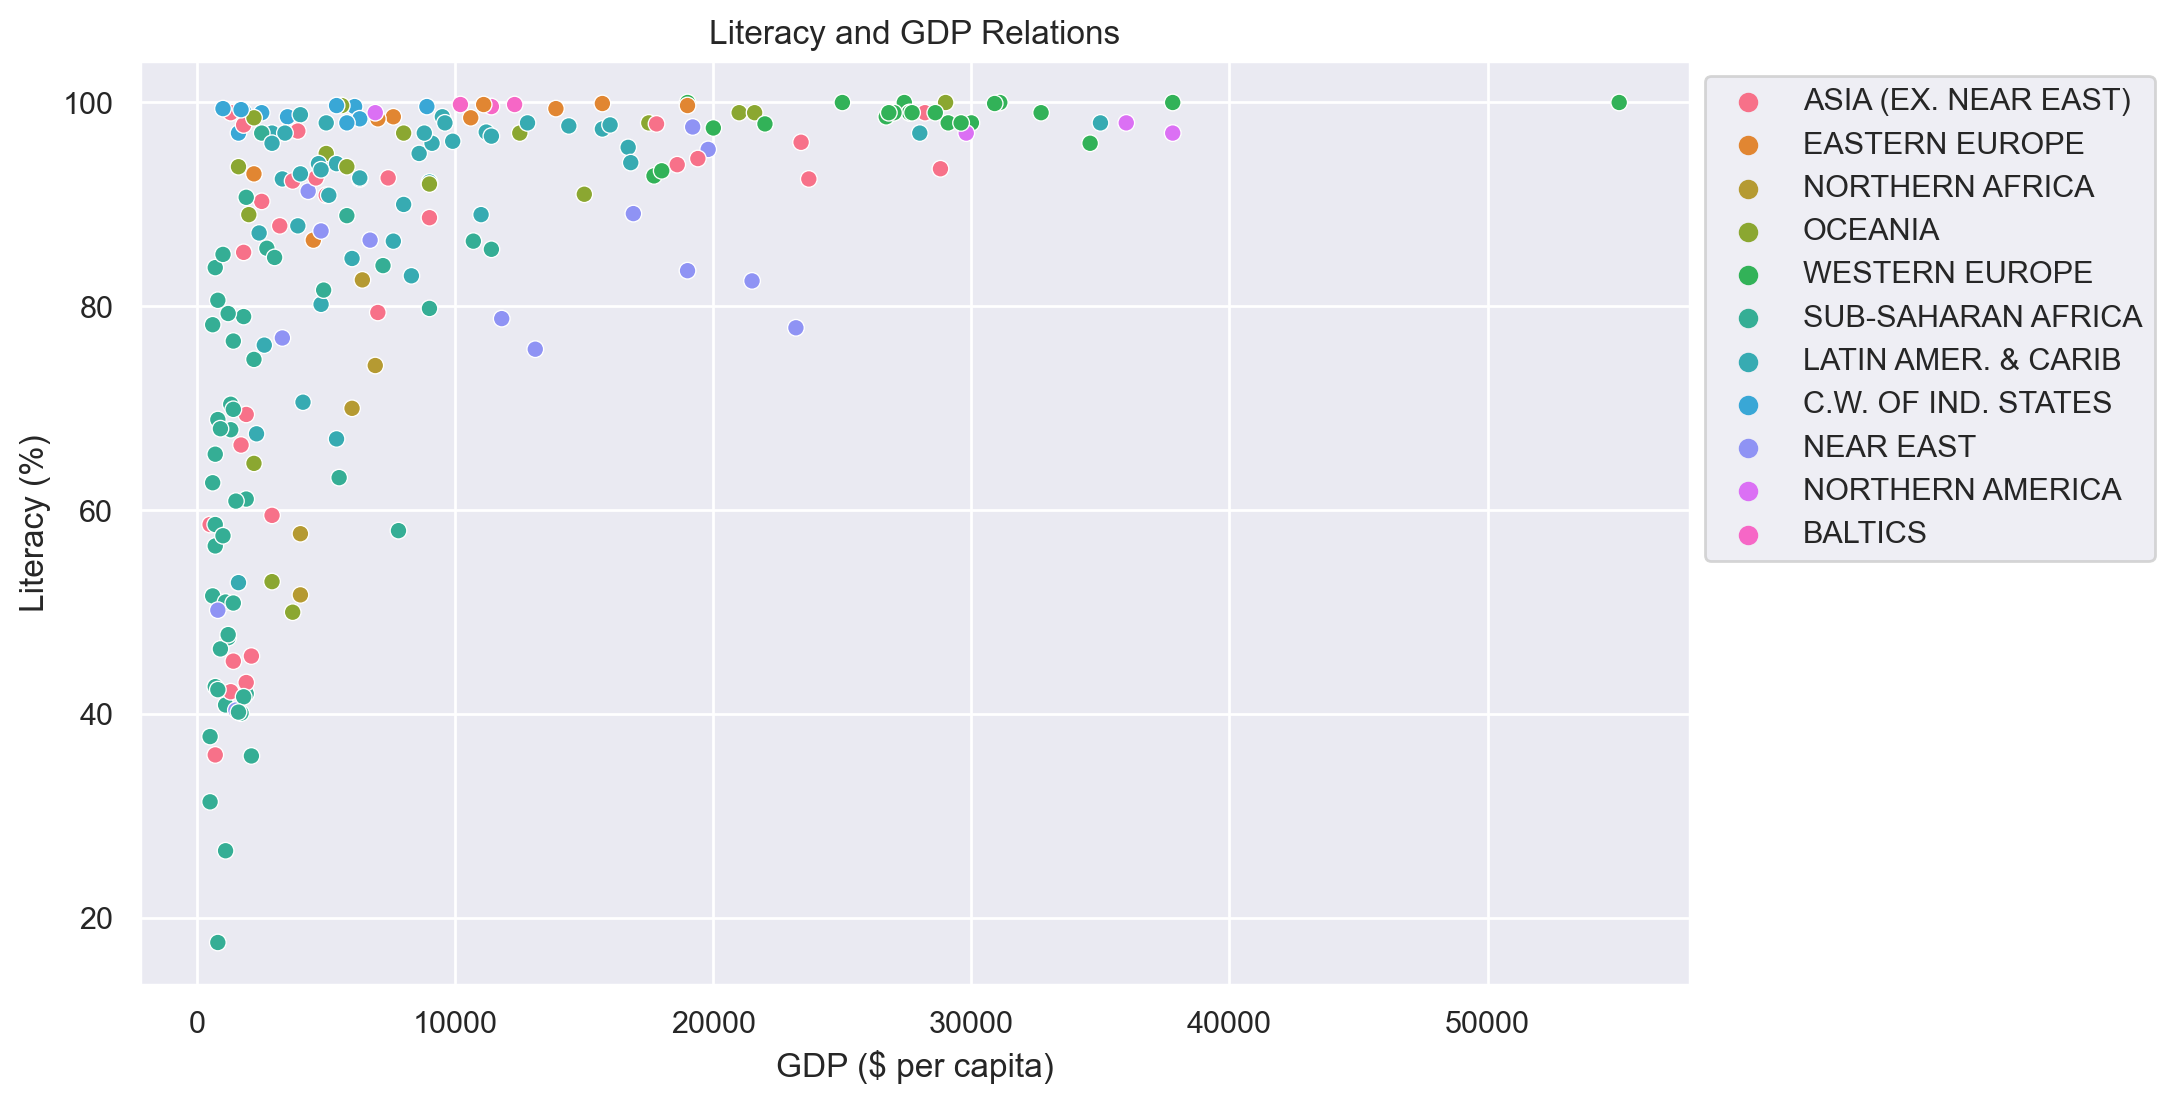

In [34]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')
plt.title("Literacy and GDP Relations")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Missing Data

In [ ]:
a = df.isnull().sum()
a[a>0]

In [35]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

<p style='font-size: 18px; color: blue;'>Mosto of them are island, based on that i will fill the values with 0 instead remove it.</p>

In [26]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [37]:
df[df['Climate'].isnull()][:2]

Country              Region  Population  Area (sq. mi.)  \
5   Angola  SUB-SAHARAN AFRICA    12127071         1246700   
36  Canada    NORTHERN AMERICA    33098932         9984670   

    Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
5                          9.7                          0.13           0.00   
36                         3.3                          2.02           5.96   

    Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
5                           191.190002              1900.0          42.0   
36                            4.750000             29800.0          97.0   

    Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
5            7.800000        2.41       0.24  97.349998      NaN  45.110001   
36         552.200012        4.96       0.02  95.019997      NaN  10.780000   

    Deathrate  Agriculture  Industry  Service  
5   24.200001        0.096     0.658    0.246  
36   7.800000        0.022     0.294    0.684

<p style='font-size: 16px; color: blue;'>The idea is to fill the null values with the average of the Region</p>

In [27]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

<p style='font-size: 16px; color: blue;'>I will perform the same ideas for Literacy Column</p>

In [28]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [40]:
a = df.isnull().sum()
a[a>0]

Net migration                         1
Infant mortality (per 1000 births)    1
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Birthrate                             1
Deathrate                             2
Industry                              1
Service                               1
dtype: int64

In [29]:
df = df.dropna()

## Data Preparation

<p style='font-size: 16px; color: blue;'>First I remove the Country column and then I get the encoding of the region column</p>

In [30]:
X = df.drop('Country', axis=1)

In [31]:
X = pd.get_dummies(X)

In [44]:
X.head()

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0    31056997          647500                   48.000000   
1     3581655           28748                  124.599998   
2    32930091         2381740                   13.800000   
3       57794             199                  290.399994   
4       71201             468                  152.100006   

   Coastline (coast/area ratio)  Net migration  \
0                      0.000000      23.059999   
1                      1.260000      -4.930000   
2                      0.040000      -0.390000   
3                     58.290001     -20.709999   
4                      0.000000       6.600000   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                          163.070007               700.0          36.0   
1                           21.520000              4500.0          86.5   
2                           31.000000              6000.0          70.0   
3                            9.270000              8000.0          97.0   
4                            4.050000             19000.0         100.0   

   Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
0           3.200000       12.13       0.22  87.650002      1.0  46.599998   
1          71.199997       21.09       4.42  74.489998      3.0  15.110000   
2          78.099998        3.22       0.25  96.529999      1.0  17.139999   
3         259.500000       10.00      15.00  75.000000      2.0  22.459999   
4         497.200012        2.22       0.00  97.779999      3.0   8.710000   

   Deathrate  Agriculture  Industry  Service  Region_ASIA (EX. NEAR EAST)  \
0      20.34        0.380     0.240    0.380                            1   
1       5.22        0.232     0.188    0.579                            0   
2       4.61        0.101     0.600    0.298                            0   
3       3.27        0.000     0.000    0.000                            0   
4       6.25        0.000     0.000    0.000                            0   

   Region_BALTICS  Region_C.W. OF IND. STATES  Region_EASTERN EUROPE  \
0               0                           0                      0   
1               0                           0                      1   
2               0                           0                      0   
3               0                           0                      0   
4               0                           0                      0   

   Region_LATIN AMER. & CARIB  Region_NEAR EAST  Region_NORTHERN AFRICA  \
0                           0                 0                       0   
1                           0                 0                       0   
2                           0                 0                       1   
3                           0                 0                       0   
4                           0                 0                       0   

   Region_NORTHERN AMERICA  Region_OCEANIA  Region_SUB-SAHARAN AFRICA  \
0                        0               0                          0   
1                        0               0                          0   
2                        0               0                          0   
3                        0               1                          0   
4                        0               0                          0   

   Region_WESTERN EUROPE  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

### Scaling Data

In [32]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## K-Means Cluster

In [34]:
ssd = []

for k in range(2, len(df)):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

### Sum of Squared Distance

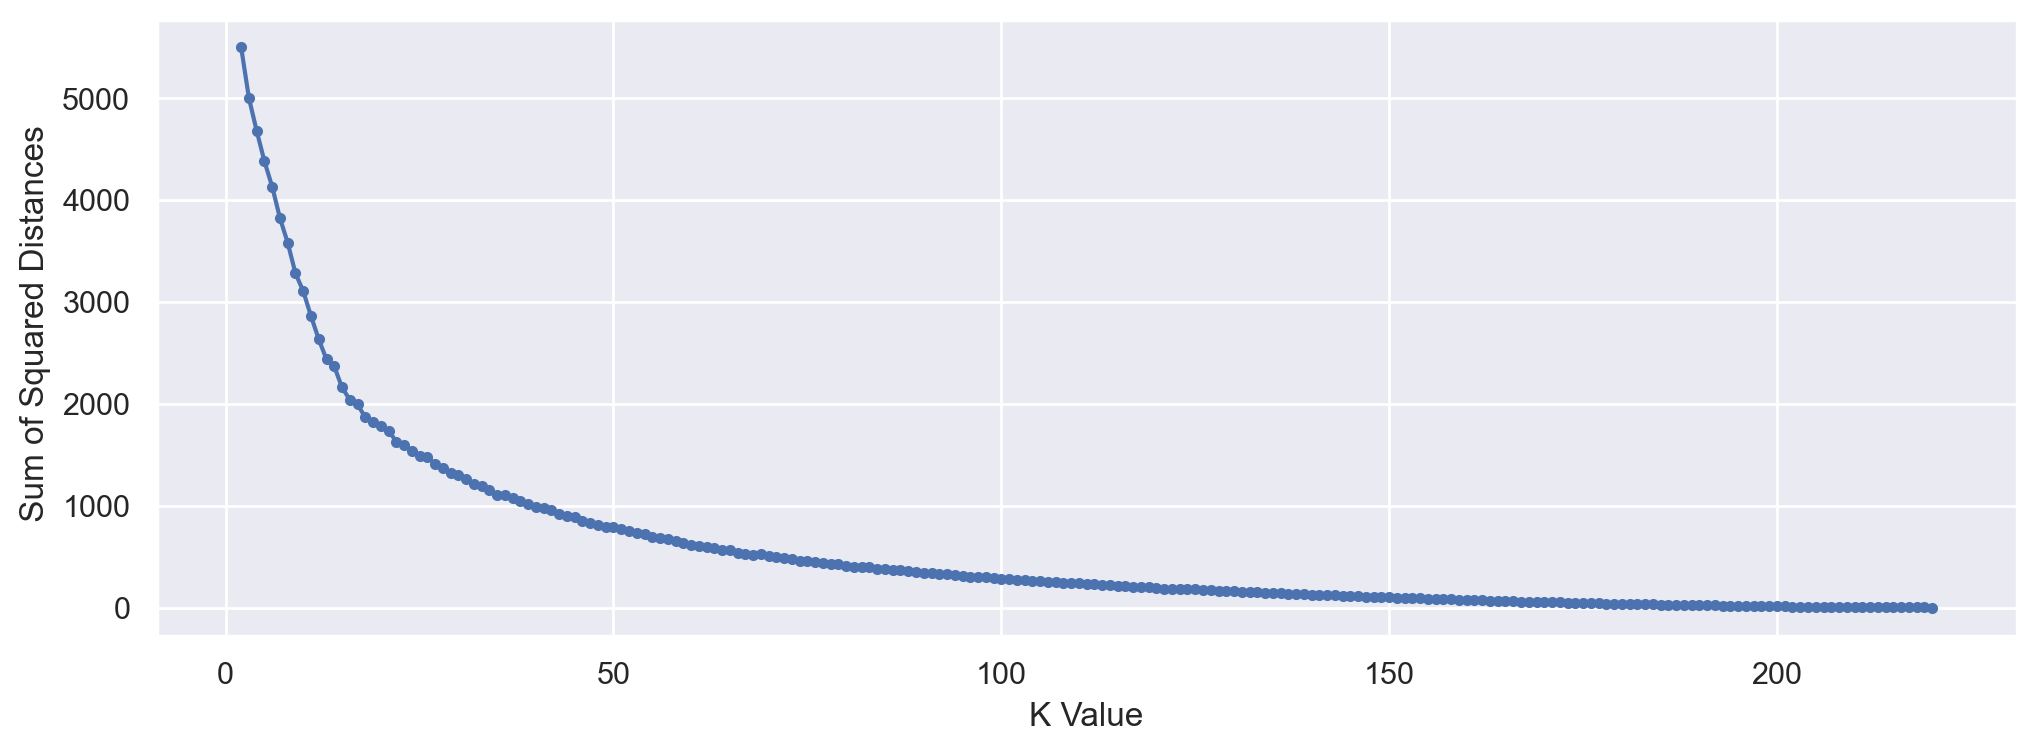

In [36]:
plt.figure(figsize=(12,4), dpi=200)
plt.plot(range(2,221),ssd,'.-')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.show()

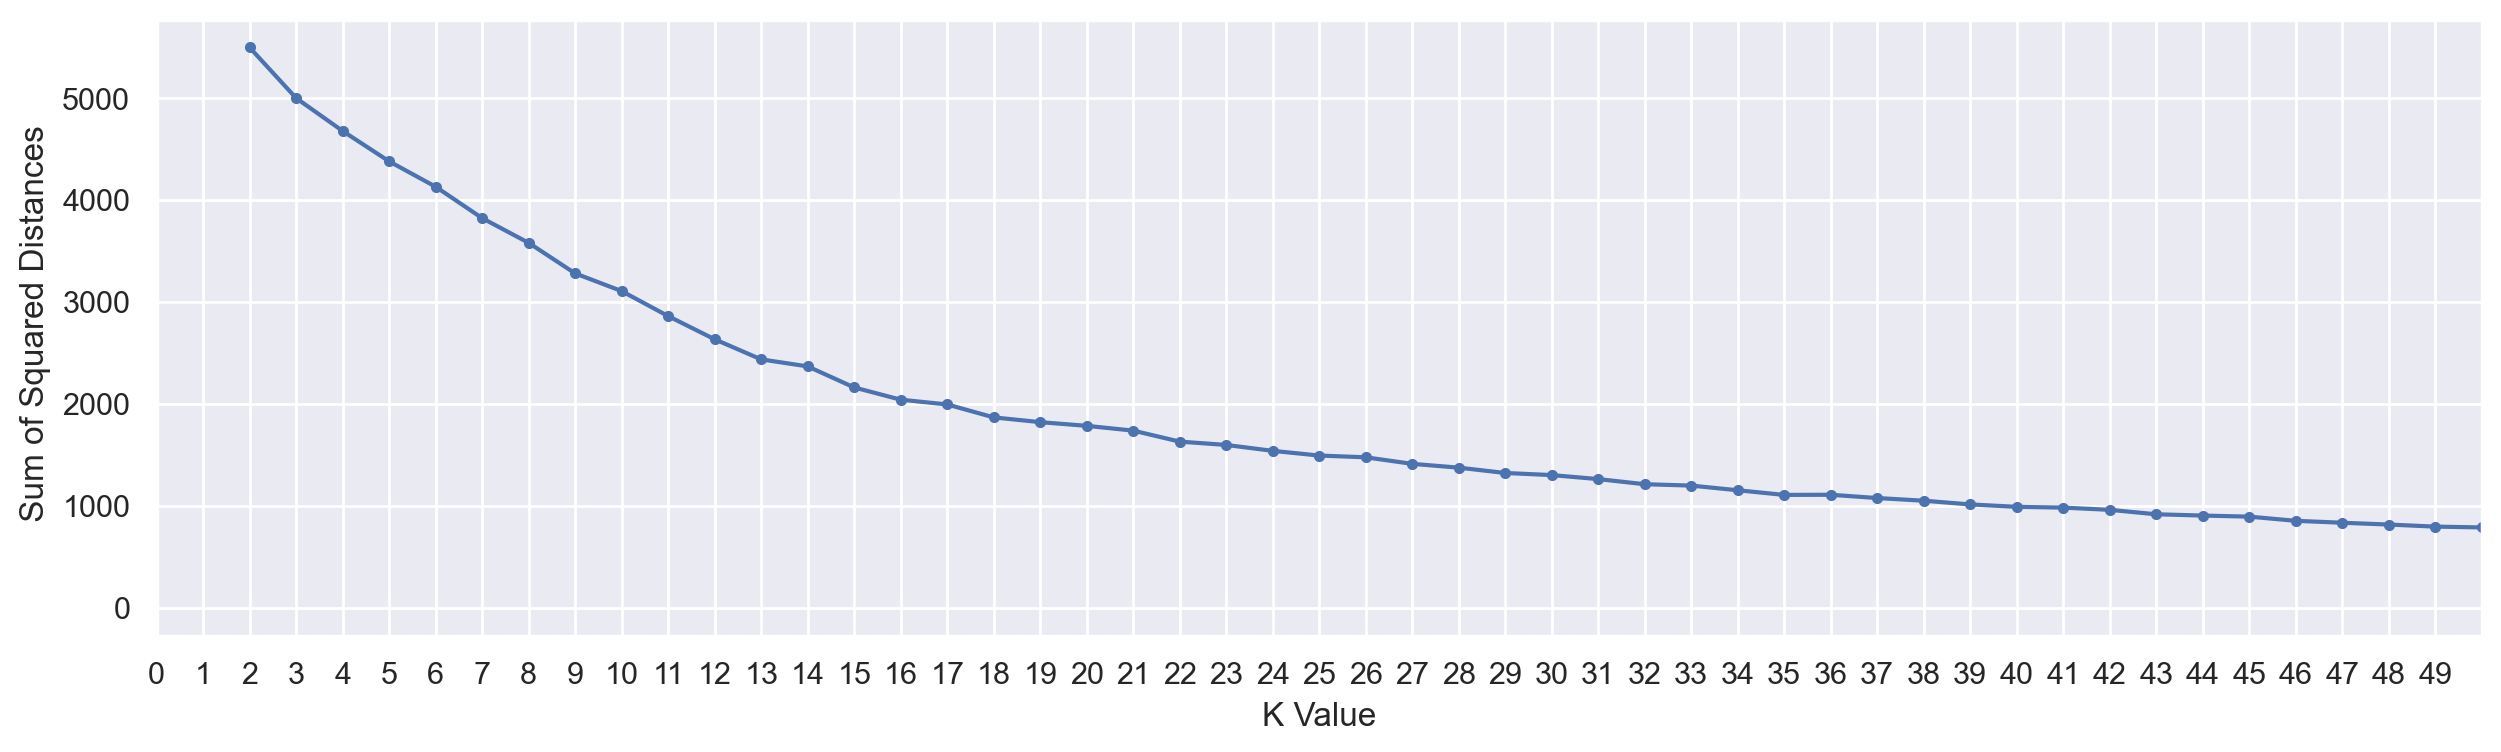

In [49]:
plt.figure(figsize=(15,4), dpi=200)
plt.plot(range(2,221),ssd,'.-')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.xlim(0, 50)
plt.xticks(range(0,50,1))
plt.show()

In [ ]:
# 13, 39

In [48]:
plt.figure(figsize=(15,4), dpi=200)
plt.plot(range(2,221),ssd,'.-')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.xlim(50, 100)
plt.ylim(0, 800)
plt.xticks(range(50,100,1))
plt.show()

In [ ]:
# 64, 78, 98

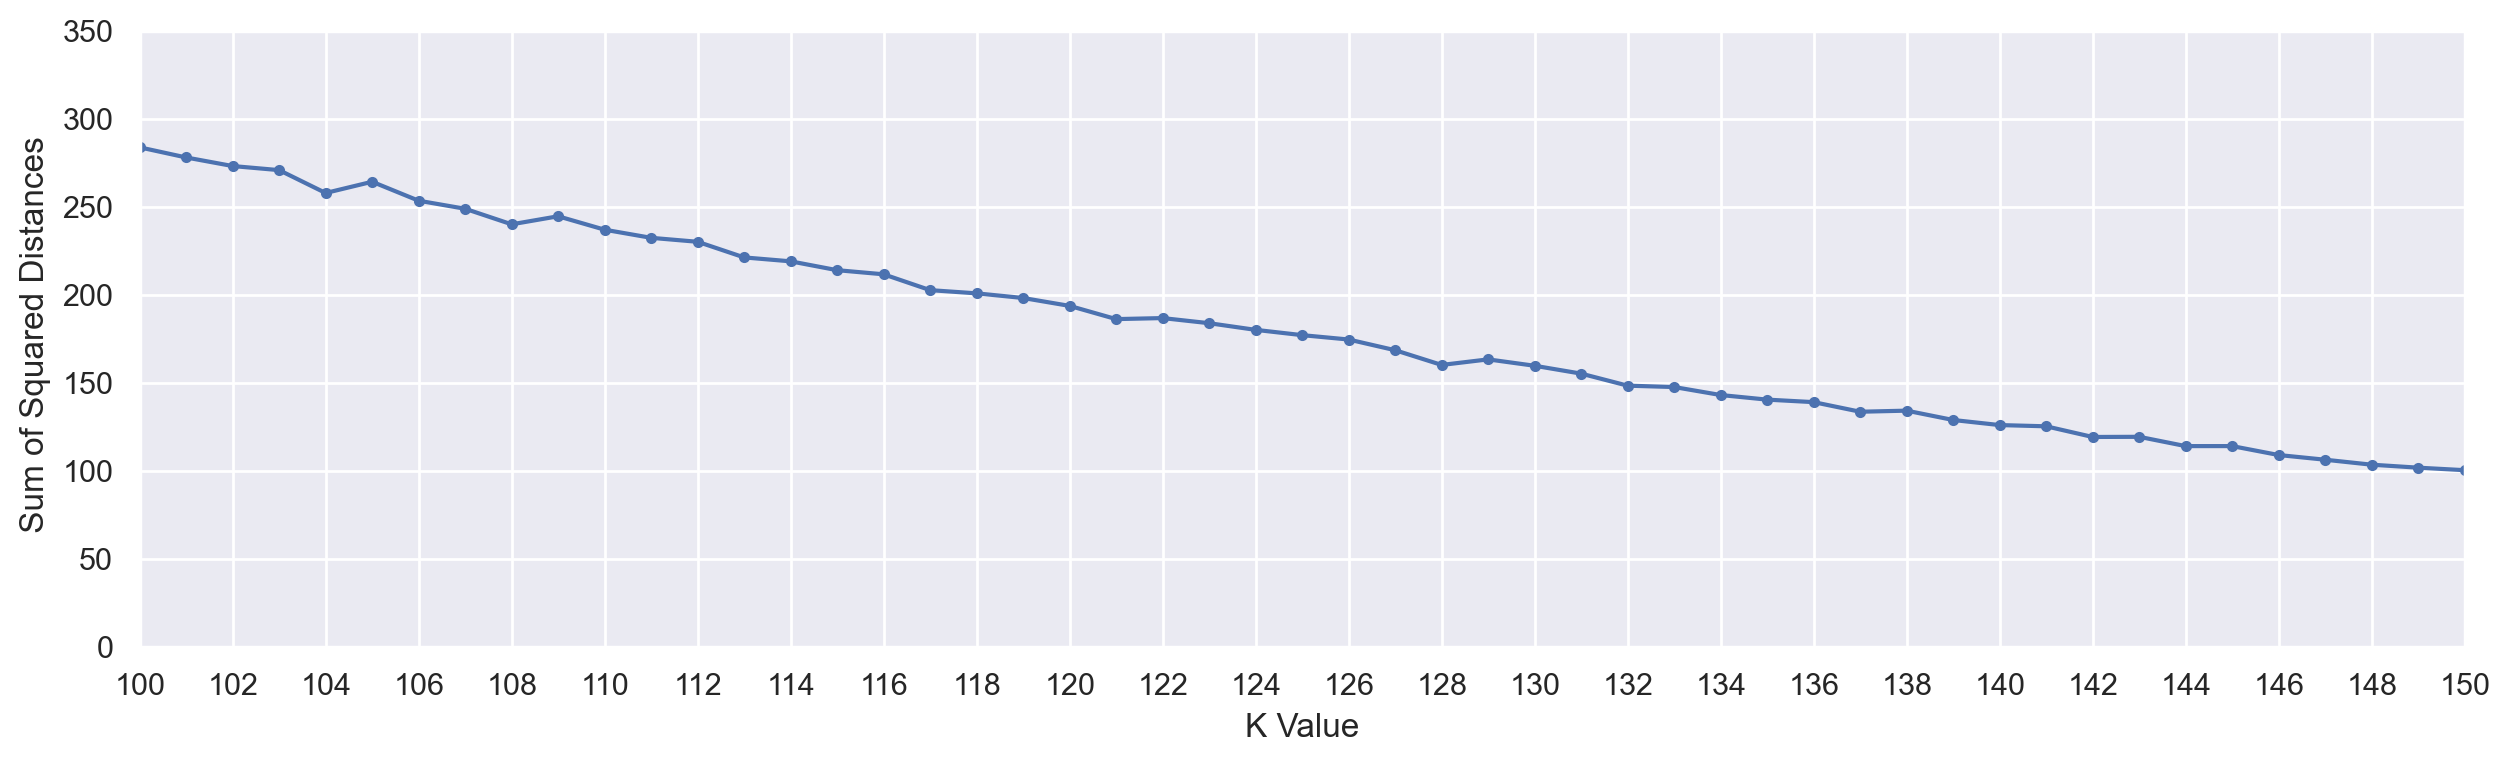

In [55]:
plt.figure(figsize=(15,4), dpi=200)
plt.plot(range(2,221),ssd,'.-')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.xlim(100, 150)
plt.ylim(0, 350)
plt.xticks(range(100,152,2))
plt.show()

In [ ]:
# 104, 128, 142

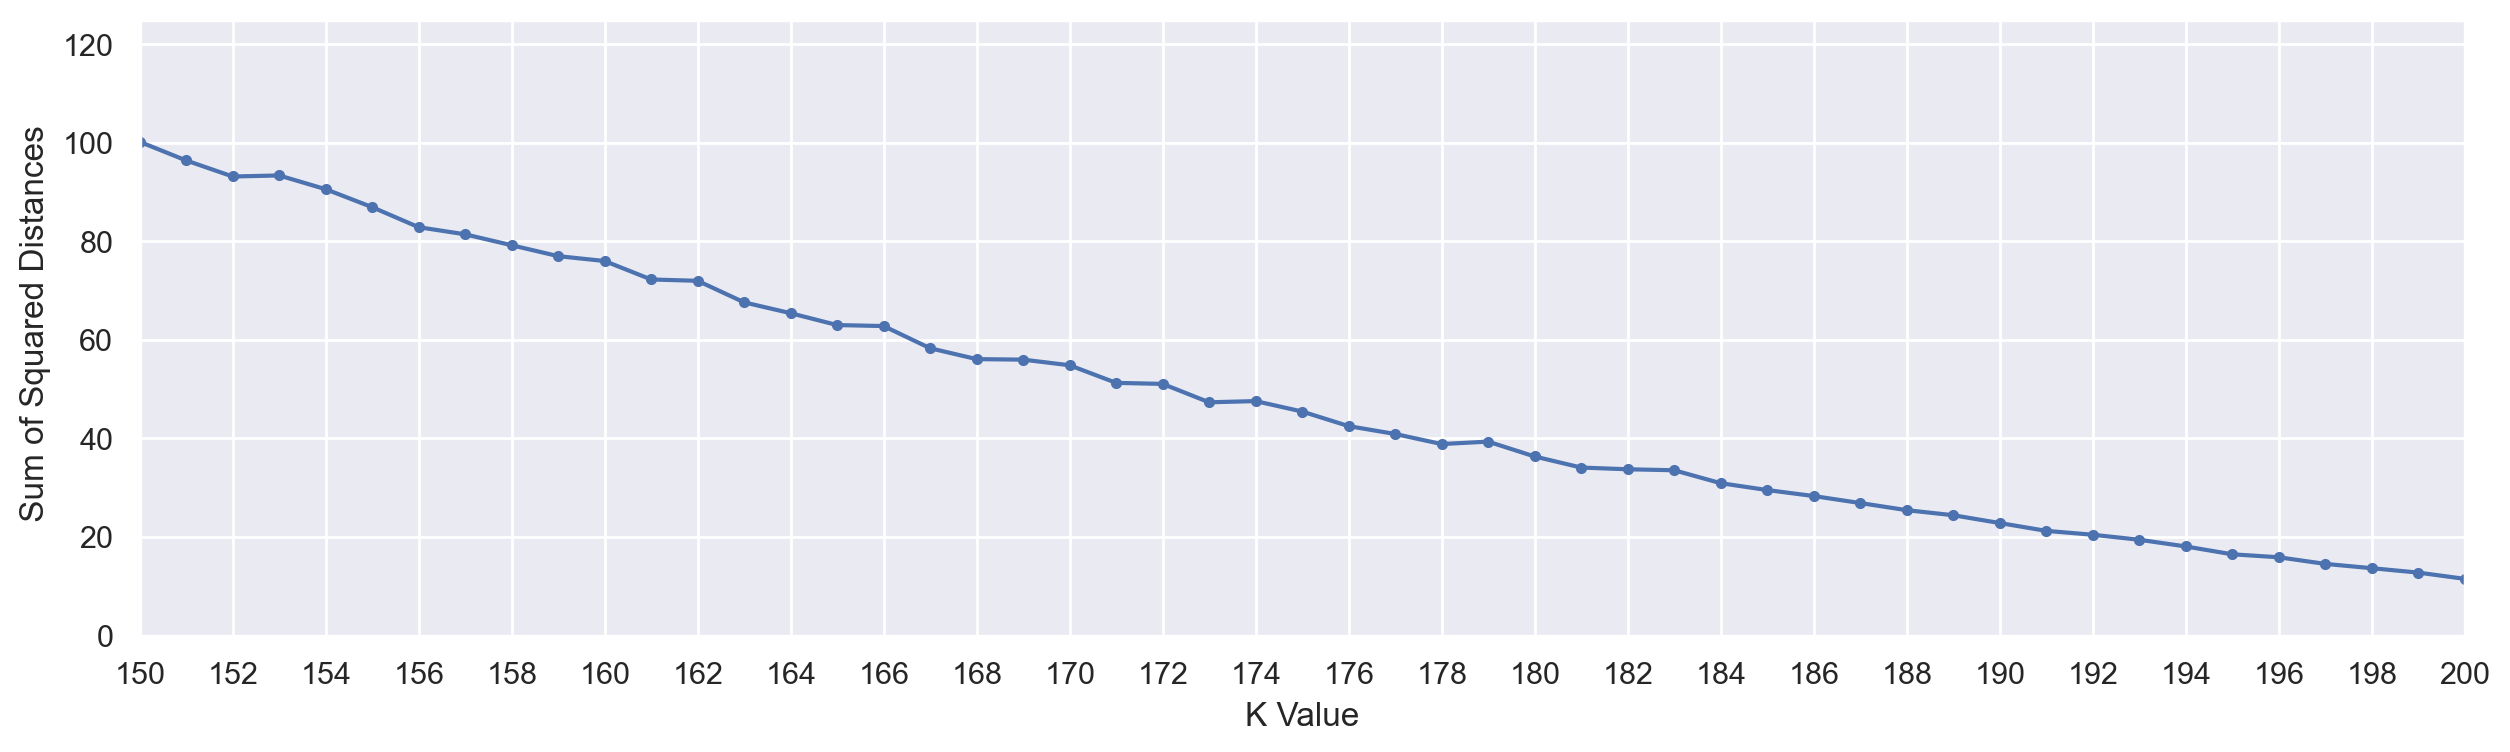

In [54]:
plt.figure(figsize=(15,4), dpi=200)
plt.plot(range(2,221),ssd,'.-')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.xlim(150, 200)
plt.ylim(0, 125)
plt.xticks(range(150,202,2))
plt.show()

In [ ]:
# 152, 171

In [56]:
model = KMeans(n_clusters=171)
model.fit(scaled_X)

KMeans(n_clusters=171)

In [57]:
X['K=171 Clusters'] = model.labels_

In [58]:
X.corr()['K=171 Clusters'].sort_values()

Coastline (coast/area ratio)         -0.175866
Area (sq. mi.)                       -0.138555
Region_NORTHERN AMERICA              -0.138096
Pop. Density (per sq. mi.)           -0.118716
Phones (per 1000)                    -0.116119
Population                           -0.108354
Crops (%)                            -0.106360
Region_OCEANIA                       -0.099949
Region_BALTICS                       -0.066829
Region_ASIA (EX. NEAR EAST)          -0.041631
Arable (%)                           -0.039791
GDP ($ per capita)                   -0.038129
Region_WESTERN EUROPE                -0.020925
Net migration                        -0.014567
Region_C.W. OF IND. STATES           -0.000611
Literacy (%)                          0.000164
Region_NORTHERN AFRICA                0.004242
Region_EASTERN EUROPE                 0.038031
Region_NEAR EAST                      0.044646
Climate                               0.051585
Service                               0.063401
Region_SUB-SA

### Adding an ISO map

In [59]:
iso_map = country_code.set_index('English short name lower case')['Alpha-3 code'].to_dict()

In [60]:
df['ISO Code'] = df['Country'].map(iso_map)

In [61]:
df['Cluster'] = model.labels_

### Plot for k=171

In [62]:
fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", 
                    hover_name="Country", 
                    color_continuous_scale='Turbo'
                    )
fig.show()

In [63]:
k = 221
model = KMeans(n_clusters=k)
model.fit(scaled_X)

KMeans(n_clusters=221)

In [64]:
X['K=221 Clusters'] = model.labels_

In [65]:
X.corr()['K=221 Clusters']

Population                           -0.117659
Area (sq. mi.)                       -0.168139
Pop. Density (per sq. mi.)           -0.148380
Coastline (coast/area ratio)         -0.207216
Net migration                        -0.089183
Infant mortality (per 1000 births)    0.009894
GDP ($ per capita)                    0.017340
Literacy (%)                          0.083422
Phones (per 1000)                    -0.033741
Arable (%)                            0.070373
Crops (%)                            -0.137927
Other (%)                             0.043315
Climate                               0.162046
Birthrate                             0.002503
Deathrate                             0.107787
Agriculture                           0.041609
Industry                              0.103655
Service                               0.192290
Region_ASIA (EX. NEAR EAST)          -0.090964
Region_BALTICS                       -0.021453
Region_C.W. OF IND. STATES           -0.072615
Region_EASTER

In [59]:
df['Cluster'] = model.labels_

### Plot for k=221

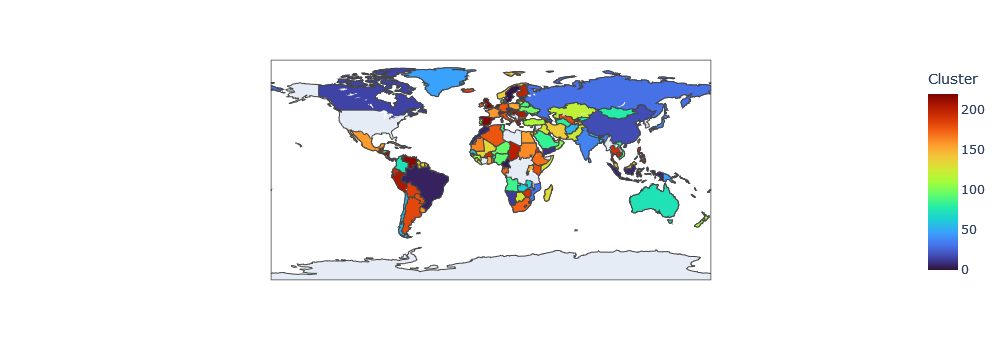

In [60]:
fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()